In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib
import pandas as pd
import mne
import numpy as np
import os
from mne.preprocessing import ICA
from sklearn.decomposition import PCA, FastICA
from scipy.signal import savgol_filter
from mpl_toolkits.mplot3d import Axes3D  # noqa
from mne.datasets import sample
from mne.decoding import UnsupervisedSpatialFilter
from mne.minimum_norm import compute_source_psd, read_inverse_operator
from mne.io import read_raw_fif
from mne.datasets import sample
from mne import pick_channels
from mne.datasets import sample
from mne.decoding import UnsupervisedSpatialFilter
from mne.minimum_norm import compute_source_psd, read_inverse_operator

# from mne_connectivity import spectral_connectivity_time
# from mne_connectivity import spectral_connectivity_epochs

# %matplotlib qt
# %gui qt
# matplotlib.use('Qt5Agg')

# Import some NeuroDSP functions to use with MNE
from neurodsp.spectral import compute_spectrum, trim_spectrum
from neurodsp.burst import detect_bursts_dual_threshold
from neurodsp.rhythm import compute_lagged_coherence

# Import NeuroDSP plotting functions
from neurodsp.plts import (plot_time_series, plot_power_spectra,
                           plot_bursts, plot_lagged_coherence)

# Import function for Morlet Wavelets
from neurodsp.timefrequency.wavelets import compute_wavelet_transform

from pyts.decomposition import SingularSpectrumAnalysis
import pywt

from tqdm import tqdm
from scipy.signal import welch
from scipy.signal import find_peaks
from scipy.integrate import trapz

from mpl_toolkits.mplot3d import Axes3D  # noqa
from tqdm.notebook import trange, tqdm

# Import the parameterization model objects
from fooof import FOOOF, FOOOFGroup

# Import useful parameterization related utilities and plot functions
from fooof.bands import Bands
from fooof.analysis import get_band_peak_fg
from fooof.utils import trim_spectrum
from fooof.utils.data import subsample_spectra
from fooof.sim.gen import gen_aperiodic
from fooof.data import FOOOFSettings
from fooof.plts.templates import plot_hist
from fooof.plts.spectra import plot_spectra
from fooof.plts.periodic import plot_peak_fits, plot_peak_params
from fooof.plts.aperiodic import plot_aperiodic_params, plot_aperiodic_fits
from fooof.plts.annotate import plot_annotated_peak_search

# Import functions to examine frequency-by-frequency error of model fits
from fooof.analysis.error import compute_pointwise_error_fm, compute_pointwise_error_fg

# Import helper utility to access data
from fooof.utils.download import fetch_fooof_data

# Import neurodsp
from neurodsp.sim import sim_combined
from neurodsp.filt import filter_signal
from neurodsp.plts import plot_time_series
from neurodsp.sim import sim_combined
from neurodsp.plts import plot_timefrequency
from neurodsp.utils import create_times

# Import functions to examine cycle by cycle 
from bycycle import Bycycle
from bycycle import BycycleGroup
from bycycle.plts import plot_burst_detect_summary, plot_feature_categorical
from bycycle.plts import plot_feature_hist
from bycycle.cyclepoints import find_extrema, find_zerox
from bycycle.cyclepoints.zerox import find_flank_zerox
from bycycle.plts import plot_cyclepoints_array
from bycycle.utils.download import load_bycycle_data

from pptx import Presentation
from pptx.util import Inches
from ipyfilechooser import FileChooser


# 1)

In [ ]:
import file_view

In [ ]:
import open_ephys_settings_gui
open_ephys_settings_gui.run_gui()

In [ ]:
import deps

# 2)

In [1]:
import file_load
# For situations where the channels need to be manually assigned - such as when 64 channels were recorded together.

In [2]:
#import file_load_v1A # need to work on for multiple loads

In [ ]:
import file_load_simple
# use when non-recording channels are deselected in open-ephys

# 3)

In [ ]:
import pickle_to_mne_v2

In [ ]:
# mne_combined_epochs.info

In [2]:
# Use This for batch loading/conversion of raw pickled files to load them into MNE python and then bandpass filter

import pickle_to_MNE_to_BPF_v1

# 4) 

In [ ]:
# Use in situations when you want to process individual MNE-raw arrays through BPF when the preceding step is "import pickle_to_mne_v2"

import bpf_mne

In [ ]:
#import bpf_mne

# 5)

In [3]:
import psd_compute # use for generating aggregate (agg) psd rather than block-based analysis for 10min segments

In [ ]:
# import psd_compute_v2 

In [ ]:
# import psd_compute_concat

In [ ]:
# import psd_compute_v3 #(optional screening; segment into blocks) Does not handle situations where the recording is less than 720 epochs

In [4]:
import psd_compute_v3b # use in situations where the recording is less than 720 epochs, but works for other situations as well

In [ ]:
# import psd_compute_concat

# 6)

In [ ]:
# import psd_clean_v1 # Load agg psd to visualize/plot not in blocks

In [1]:
import psd_clean_v1b #Also use for aggregated files only. Improved file export
# Remember to enter the file extension like .svg into the file name at the bottom or it wont export

In [ ]:
# Start again with segmenting wt data.

## If you only want to do the 10min segment you can start from this, which used the filtered fif 

In [6]:
import psd_clean_v2d3 #Newest version USE THIS. Also handles situation where recordings are shorter than 720 epochs

In [ ]:
# import psd_clean

## Extract Channel Means from aggregated data

In [2]:
import psd_channel_means_v1b # improved file export to correct directory

In [ ]:
# For Aggregated files that are not segmented
import psd_channel_means # use to load agg files where no segmentation into blocks is applied

In [ ]:
#import psd_channel_means_v2
# enable exporting in merged mode of channels means

In [ ]:
#import psd_channel_means_v4

In [ ]:
#import psd_channel_means_v6

# 7)

In [ ]:
import psd_channel_means_v8b # For segmented data where you have blocks

In [7]:
# USE THIS

import psd_channel_means_v8c # use to plot mean of means by block or by channel, input clean psd pickle. 
# Doesnt load agg files

In [ ]:
#import psd_channel_means_v7

In [ ]:
#import multi_psd_viewer
# multi_psd_viewer.build_multi_psd_gui()


## convert clean pickled psd to excel

# 8)

In [8]:
import psd_pickle_to_excel_v2

FileUpload(value=(), description='Upload .pkl file')

Text(value='output.xlsx', description='Output .xlsx path:')

Button(description='Process Data', style=ButtonStyle())

Output()

In [ ]:
#import psd_pickle_to_excel_v2B

In [ ]:
# import psd_pickle_to_excel_v3 # Need to finish

In [ ]:
# import psd_pickle_to_excel_v2 # needs .xlsx extension in excel path, use to 

In [ ]:
# import psd_combine # needs editing, use raw code below. Need to adapt this code so that the data is correctly organized

In [ ]:
# import excel_to_1d_array

# 9)

In [9]:
import full_clean_excel_to_means_v2 # use this to create excel that has seperated sheets, which is properly recognized in the FOOOF pipeline
# select seperate sheets to ensure it is properly loaded into FOOOF

In [ ]:
#import join_mean_clean_excel

from join_mean_clean_excel import launch_gui
launch_gui()

# combine multiple excels into a single file that can be processed through FOOOF

In [10]:
from join_mean_clean_excel_v1B import launch_gui
launch_gui()

# 10)

In [ ]:
# import excel_to_1darray_to_FOOOF # does everything - loads excel, converts to 1d array, runs FOOOF, displays fitting for full data

In [ ]:
# import full_clean_excel_to_means 

In [ ]:
# import excel_to_1darray_to_FOOOF_v2

In [ ]:
import excel_to_1darray_to_FOOOF_v1A # use to fit and visualize fit

In [ ]:
import excel_to_1darray_to_FOOOF_v1A2 # visualize, export as svg the figures, export pickle for next step

In [ ]:
# import excel_to_1darray_to_FOOOF_v3

In [ ]:
import excel_to_1darray_to_FOOOF_v1AA # auto run without to fit but ignore plot viewing, includes export as pickle. 

In [ ]:
import excel_to_1darray_to_FOOOF_v1A3

In [ ]:
import excel_to_1darray_to_FOOOF_v1A4

In [ ]:
import excel_to_1darray_to_FOOOF_v1A5

In [ ]:
import excel_to_1darray_to_FOOOF_v1A7

In [11]:
import excel_to_1darray_to_FOOOF_v1A8

In [ ]:
# Plot from excel file containing FOOOF data that has been organized manually

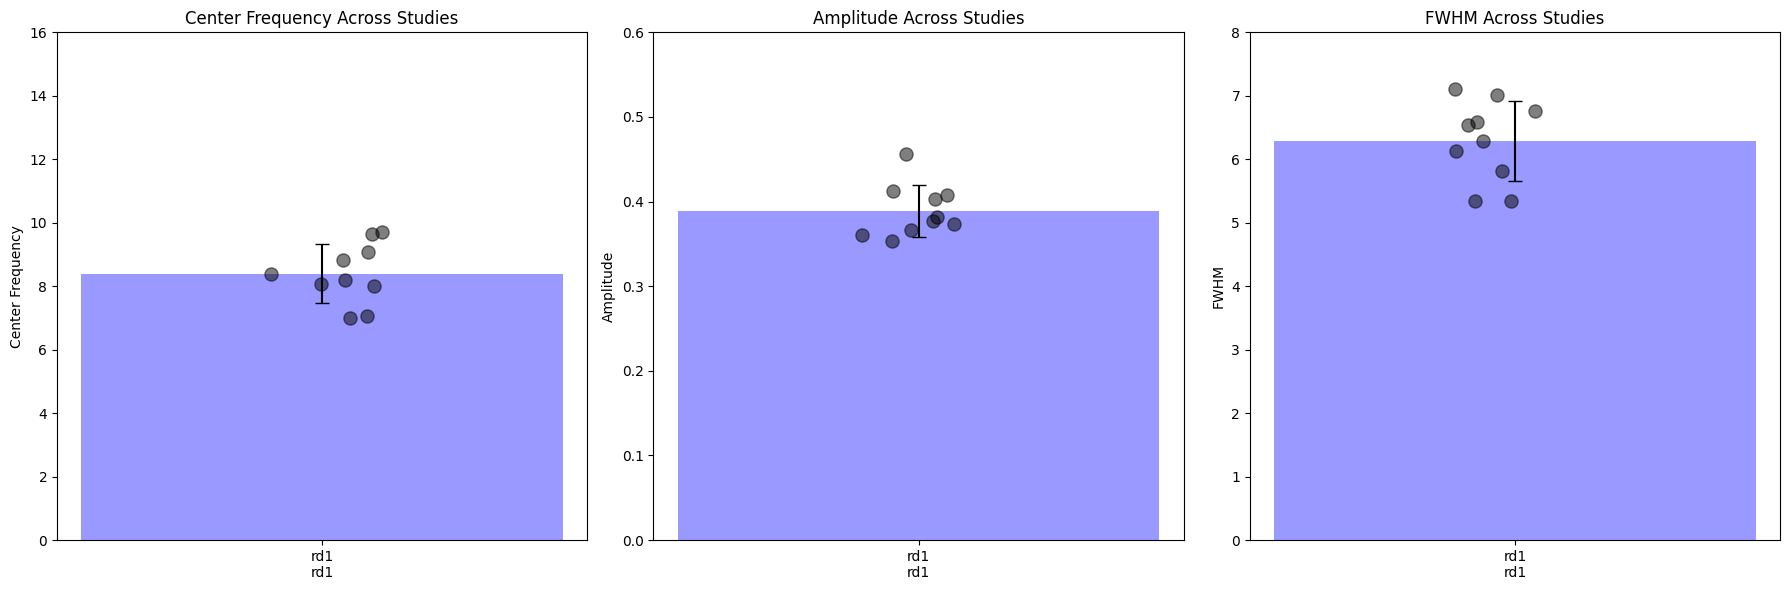

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Trim whitespace from column names
df.columns = df.columns.str.strip()

# Define minimum frequency threshold (e.g., exclude peaks below 7 Hz)
min_freq = 1

# Define study groups to include in the plot (modify as needed)
selected_study_groups = [("rd1", "rd1")]  # Adjust based on actual column values

# Define parameters
parameters = ["Center Frequency", "Amplitude", "FWHM"]

# Set up the figure with subplots
fig, axes = plt.subplots(1, len(parameters), figsize=(18, 6), sharey=False)

# Loop through each parameter
for i, param in enumerate(parameters):
    ax = axes[i]
    means = []
    std_devs = []
    plot_data = []  # Store individual values
    labels = []  # Store x-axis labels

    # Iterate through selected study groups
    for group, study in selected_study_groups:
        df_filtered = df[(df["Group"] == group) & (df["Study"] == study)]
        
        # Apply frequency threshold
        df_filtered = df_filtered[df_filtered["Center Frequency"] >= min_freq]
        
        # Drop NaN values for correct calculations
        valid_values = df_filtered[param].dropna()
        
        if not valid_values.empty:
            mean_val = valid_values.mean()
            std_val = valid_values.std()

            means.append(mean_val)
            std_devs.append(std_val)
            plot_data.append(valid_values.values)
            labels.append(f"{group}\n{study}")

    # Create bar plot with manually computed error bars
    ax.bar(labels, means, yerr=std_devs, capsize=5, color="blue", alpha=0.4)

    # Overlay individual data points with added jitter to reduce overlap
    for j, data in enumerate(plot_data):
        jitter = np.random.uniform(-0.1, 0.1, size=data.shape)
        x_vals = np.full_like(data, j, dtype=float) + jitter
        ax.scatter(x_vals, data, color="black", s=90, alpha=0.5)

    # Label plot
    ax.set_title(f"{param} Across Studies")
    ax.set_ylabel(param)
    
    # Set the y-axis limits to improve visualization
    if i == 0:
        ax.set_ylim(0, 16)
    elif i == 1:
        ax.set_ylim(0, 0.6)
    elif i == 2:
        ax.set_ylim(0, 8)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


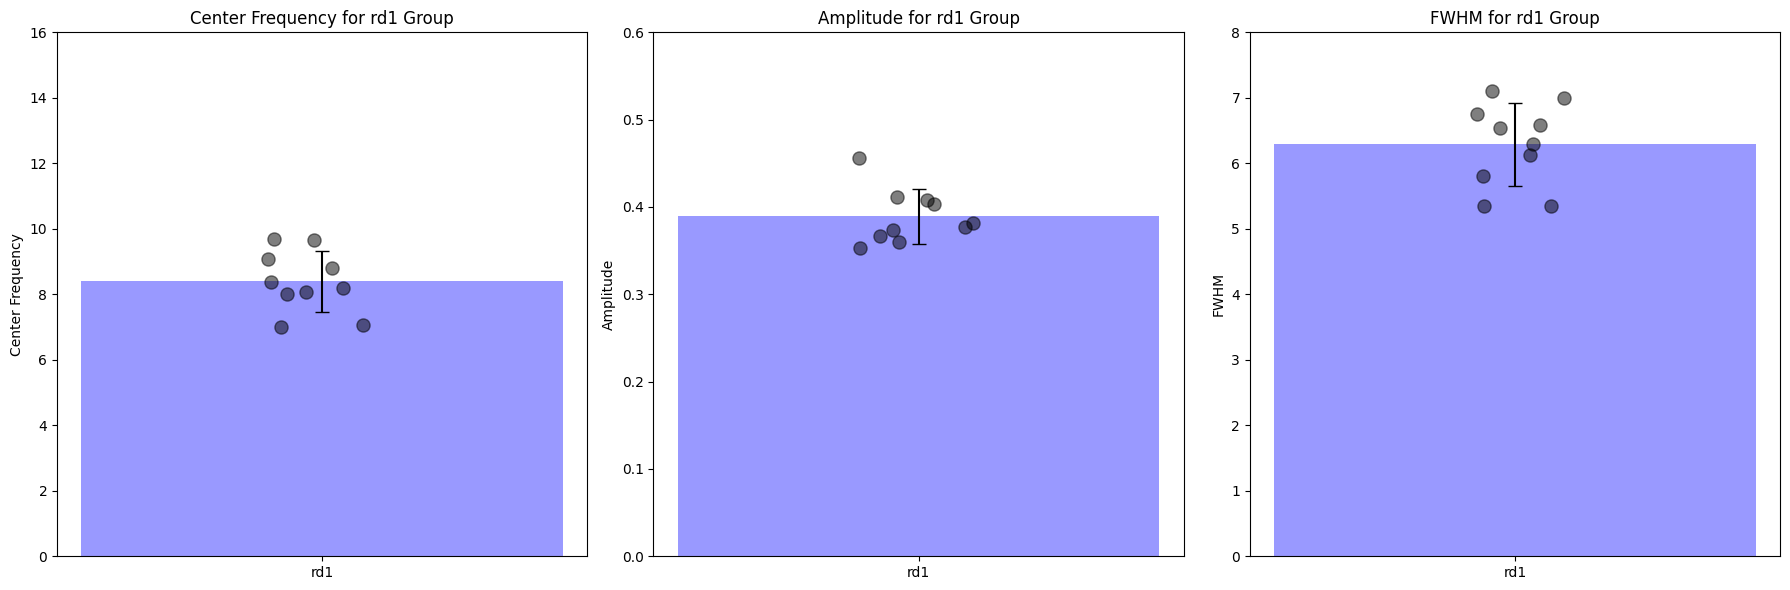

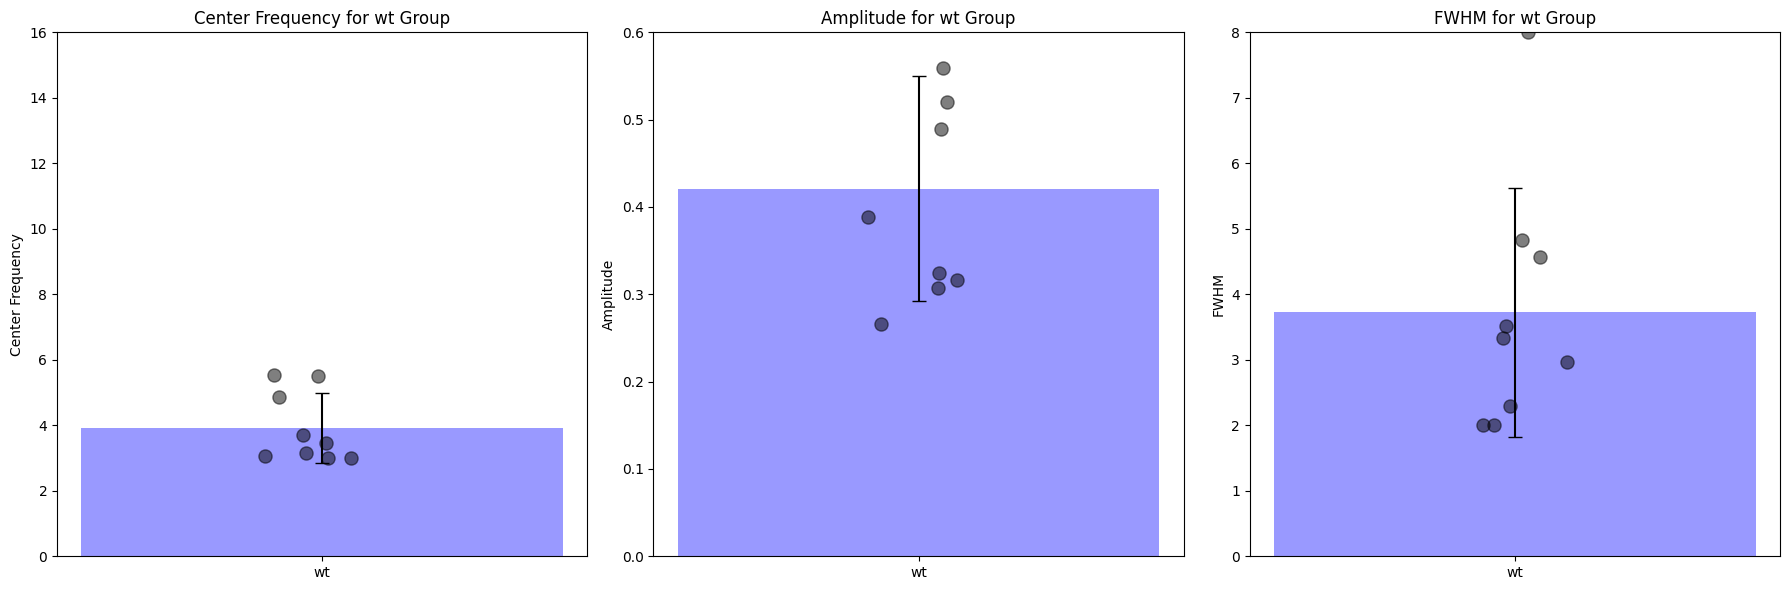

In [18]:
# Extract unique group names
unique_groups = df["Group"].unique()

# Define parameters
parameters = ["Center Frequency", "Amplitude", "FWHM"]

# Create separate bar plots for "rd1" and "wt" groups
for group in unique_groups:
    fig, axes = plt.subplots(1, len(parameters), figsize=(18, 6), sharey=False)
    
    for i, param in enumerate(parameters):
        ax = axes[i]
        means = []
        std_devs = []
        plot_data = []  # Store individual values
        labels = []  # Store x-axis labels

        # Filter data for the given group
        df_filtered = df[df["Group"] == group]
        
        # Apply frequency threshold
        df_filtered = df_filtered[df_filtered["Center Frequency"] >= min_freq]
        
        # Drop NaN values for correct calculations
        valid_values = df_filtered[param].dropna()
        
        if not valid_values.empty:
            mean_val = valid_values.mean()
            std_val = valid_values.std()

            means.append(mean_val)
            std_devs.append(std_val)
            plot_data.append(valid_values.values)
            labels.append(group)

        # Create bar plot with manually computed error bars
        ax.bar(labels, means, yerr=std_devs, capsize=5, color="blue", alpha=0.4)

        # Overlay individual data points with added jitter to reduce overlap
        for j, data in enumerate(plot_data):
            jitter = np.random.uniform(-0.1, 0.1, size=data.shape)
            x_vals = np.full_like(data, j, dtype=float) + jitter
            ax.scatter(x_vals, data, color="black", s=90, alpha=0.5)

        # Label plot
        ax.set_title(f"{param} for {group} Group")
        ax.set_ylabel(param)
        
        # Set the y-axis limits to improve visualization
        if i == 0:
            ax.set_ylim(0, 16)
        elif i == 1:
            ax.set_ylim(0, 0.6)
        elif i == 2:
            ax.set_ylim(0, 8)

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()


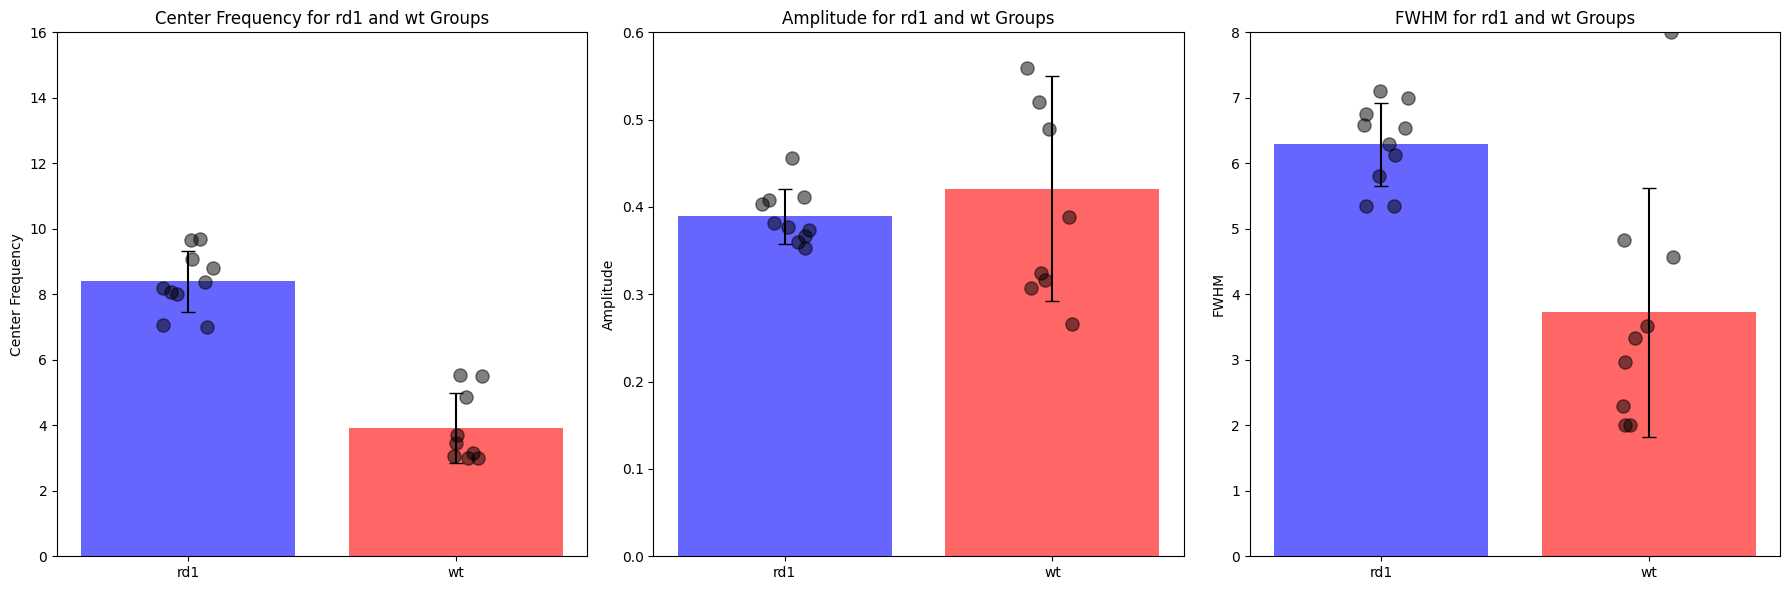

In [19]:
# Define parameters
parameters = ["Center Frequency", "Amplitude", "FWHM"]
group_colors = {"rd1": "blue", "wt": "red"}  # Assign different colors to groups

# Set up the figure with subplots
fig, axes = plt.subplots(1, len(parameters), figsize=(18, 6), sharey=False)

# Loop through each parameter
for i, param in enumerate(parameters):
    ax = axes[i]
    means = []
    std_devs = []
    labels = []  # Store x-axis labels
    colors = []  # Store colors for each group

    # Iterate through groups (rd1 and wt)
    for group in ["rd1", "wt"]:
        df_filtered = df[df["Group"] == group]

        # Apply frequency threshold
        df_filtered = df_filtered[df_filtered["Center Frequency"] >= min_freq]

        # Drop NaN values for correct calculations
        valid_values = df_filtered[param].dropna()

        if not valid_values.empty:
            mean_val = valid_values.mean()
            std_val = valid_values.std()

            means.append(mean_val)
            std_devs.append(std_val)
            labels.append(group)
            colors.append(group_colors[group])

    # Create grouped bar plot with error bars
    ax.bar(labels, means, yerr=std_devs, capsize=5, color=colors, alpha=0.6)

    # Overlay individual data points with jitter to reduce overlap
    for j, group in enumerate(["rd1", "wt"]):
        df_filtered = df[df["Group"] == group]
        df_filtered = df_filtered[df_filtered["Center Frequency"] >= min_freq]
        valid_values = df_filtered[param].dropna()

        if not valid_values.empty:
            jitter = np.random.uniform(-0.1, 0.1, size=valid_values.shape)
            x_vals = np.full_like(valid_values, j, dtype=float) + jitter
            ax.scatter(x_vals, valid_values, color="black", s=90, alpha=0.5)

    # Label plot
    ax.set_title(f"{param} for rd1 and wt Groups")
    ax.set_ylabel(param)

    # Set the y-axis limits for better visualization
    if i == 0:
        ax.set_ylim(0, 16)
    elif i == 1:
        ax.set_ylim(0, 0.6)
    elif i == 2:
        ax.set_ylim(0, 8)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


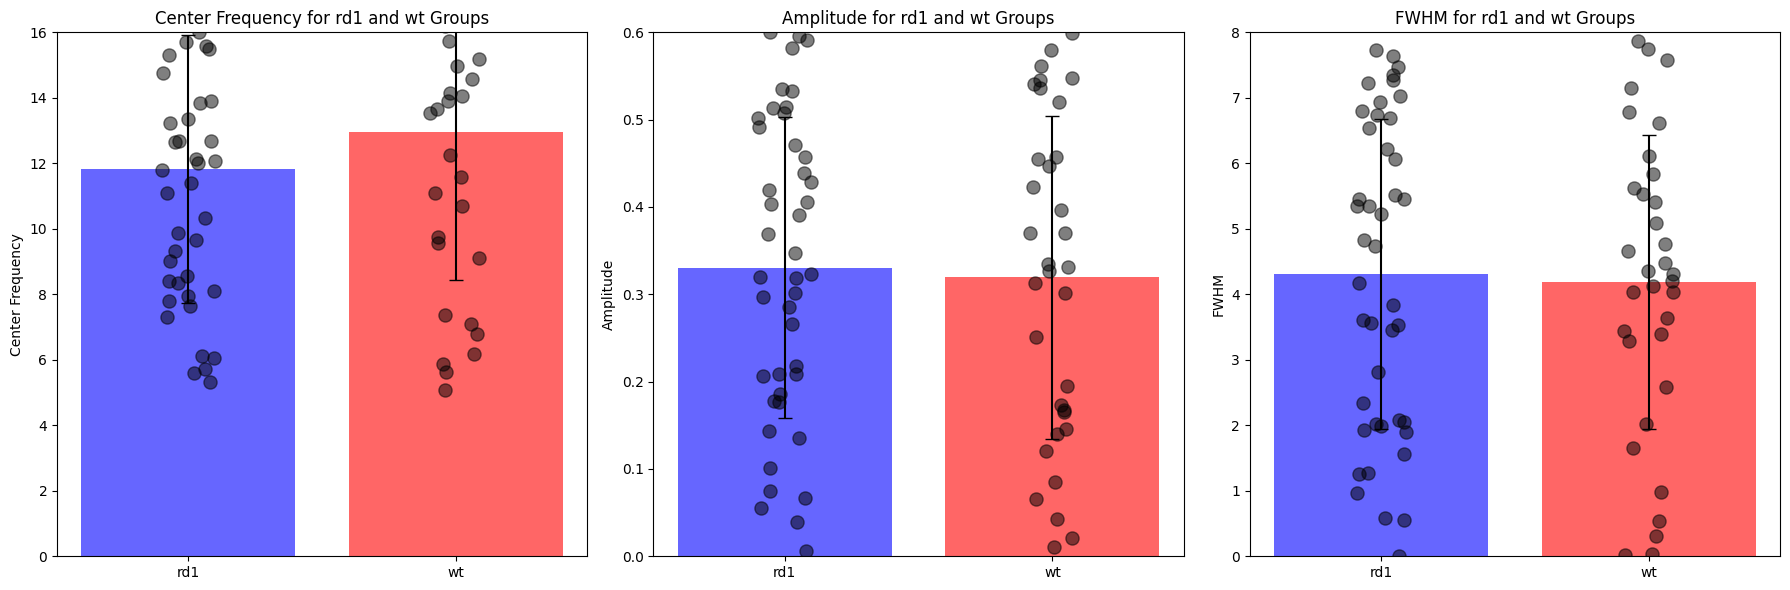

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Define parameters
parameters = ["Center Frequency", "Amplitude", "FWHM"]
group_colors = {"rd1": "blue", "wt": "red"}  # Assign different colors to groups

# Example dataframe (replace with actual data)
data = {
    "Group": np.random.choice(["rd1", "wt"], size=100),
    "Center Frequency": np.random.uniform(0, 20, size=100),
    "Amplitude": np.random.uniform(0, 0.6, size=100),
    "FWHM": np.random.uniform(0, 8, size=100),
}
df = pd.DataFrame(data)

# Set minimum frequency threshold
min_freq = 5

# Set up the figure with subplots
fig, axes = plt.subplots(1, len(parameters), figsize=(18, 6), sharey=False)

# Loop through each parameter
for i, param in enumerate(parameters):
    ax = axes[i]
    means = []
    std_devs = []
    labels = []  # Store x-axis labels
    colors = []  # Store colors for each group

    # Iterate through groups (rd1 and wt)
    for group in ["rd1", "wt"]:
        df_filtered = df[df["Group"] == group]

        # Apply frequency threshold
        df_filtered = df_filtered[df_filtered["Center Frequency"] >= min_freq]

        # Drop NaN values for correct calculations
        valid_values = df_filtered[param].dropna()

        if not valid_values.empty:
            mean_val = valid_values.mean()
            std_val = valid_values.std()

            means.append(mean_val)
            std_devs.append(std_val)
            labels.append(group)
            colors.append(group_colors[group])

    # Create grouped bar plot with error bars
    ax.bar(labels, means, yerr=std_devs, capsize=5, color=colors, alpha=0.6)

    # Overlay individual data points with jitter to reduce overlap
    for j, group in enumerate(["rd1", "wt"]):
        df_filtered = df[df["Group"] == group]
        df_filtered = df_filtered[df_filtered["Center Frequency"] >= min_freq]
        valid_values = df_filtered[param].dropna()

        if not valid_values.empty:
            jitter = np.random.uniform(-0.1, 0.1, size=valid_values.shape)
            x_vals = np.full_like(valid_values, j, dtype=float) + jitter
            ax.scatter(x_vals, valid_values, color="black", s=90, alpha=0.5)

    # Label plot
    ax.set_title(f"{param} for rd1 and wt Groups")
    ax.set_ylabel(param)

    # Set the y-axis limits for better visualization
    if i == 0:
        ax.set_ylim(0, 16)
    elif i == 1:
        ax.set_ylim(0, 0.6)
    elif i == 2:
        ax.set_ylim(0, 8)

# Adjust layout and save plot
plt.tight_layout()
plt.savefig("plot.svg", format="svg")  # Save as SVG
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the file path
file_path = r"C:\Users\GhezziLab\Downloads\FOOOF_Params_for_varied_fit_update_correct.xlsx"

# Load the Excel file
df = pd.read_excel(file_path)

# Trim whitespace from column names
df.columns = df.columns.str.strip()

# Correctly filter for "Pilot" study
df_pilot = df[df["Study"] == "Pilot"]

# Check if data is empty after filtering
if df_pilot.empty:
    print("Error: No data found for 'Pilot' study.")
else:
    # Convert categorical columns to ensure consistency
    df_pilot["Group"] = df_pilot["Group"].astype(str)
    df_pilot["Eye"] = df_pilot["Eye"].astype(str)

    # Define the parameters to plot
    parameters = ["Center Frequency", "Amplitude", "FWHM"]

    # Set up the figure with subplots
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    for i, param in enumerate(parameters):
        ax = axes[i]
        
        # Plot mean ± SD
        sns.barplot(
            data=df_pilot, x="Group", y=param, hue="Eye", capsize=0.1,
            errwidth=1, palette="viridis", ax=ax, errorbar="sd"
        )
        
        # Overlay individual data points
        sns.stripplot(
            data=df_pilot, x="Group", y=param, hue="Eye",
            dodge=True, jitter=True, color="black", alpha=0.6, ax=ax
        )

        ax.set_title(f"{param} in Pilot Study")
        ax.set_ylabel(param)
        ax.set_xlabel("Group (rd1 vs. wt)")
        ax.legend(title="Eye")

    plt.tight_layout()
    plt.show()



In [ ]:
# Load the latest Excel file again
file_path = r"C:\Users\GhezziLab\Downloads\FOOOF_Params_for_varied_fit.xlsx"
df = pd.read_excel(file_path)

# Trim whitespace from column names
df.columns = df.columns.str.strip()

# Define study groups to plot
study_groups = [("rd1", "Pilot"), ("rd1", "Chronic"), ("wt", "Chronic")]

# Define parameters
parameters = ["Center Frequency", "Amplitude", "FWHM"]

# Set up the figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Loop through each parameter
for i, param in enumerate(parameters):
    ax = axes[i]
    plot_data = []  # Store data for plotting
    labels = []  # Store x-axis labels

    # Iterate through study groups
    for group, study in study_groups:
        df_filtered = df[(df["Group"] == group) & (df["Study"] == study)]
        
        # Replace NaN with zero for visualization but exclude from mean calculation
        df_filtered[param] = df_filtered[param].fillna(0)

        # Store data for plotting
        plot_data.append(df_filtered[param].values)
        labels.append(f"{group}\n{study}")

    # Create bar plot with error bars
    sns.barplot(data=plot_data, capsize=0.1, errwidth=1, ax=ax, palette="viridis", errorbar="sd")

    # Overlay individual data points
    for j, data in enumerate(plot_data):
        x_vals = [j] * len(data)
        ax.scatter(x_vals, data, color="black", s=30, alpha=0.6)  # Circles 3x larger

    # Label plot
    ax.set_title(f"{param} Across Studies")
    ax.set_xticklabels(labels)
    ax.set_ylabel(param)

# Adjust layout and display
plt.tight_layout()
plt.show()


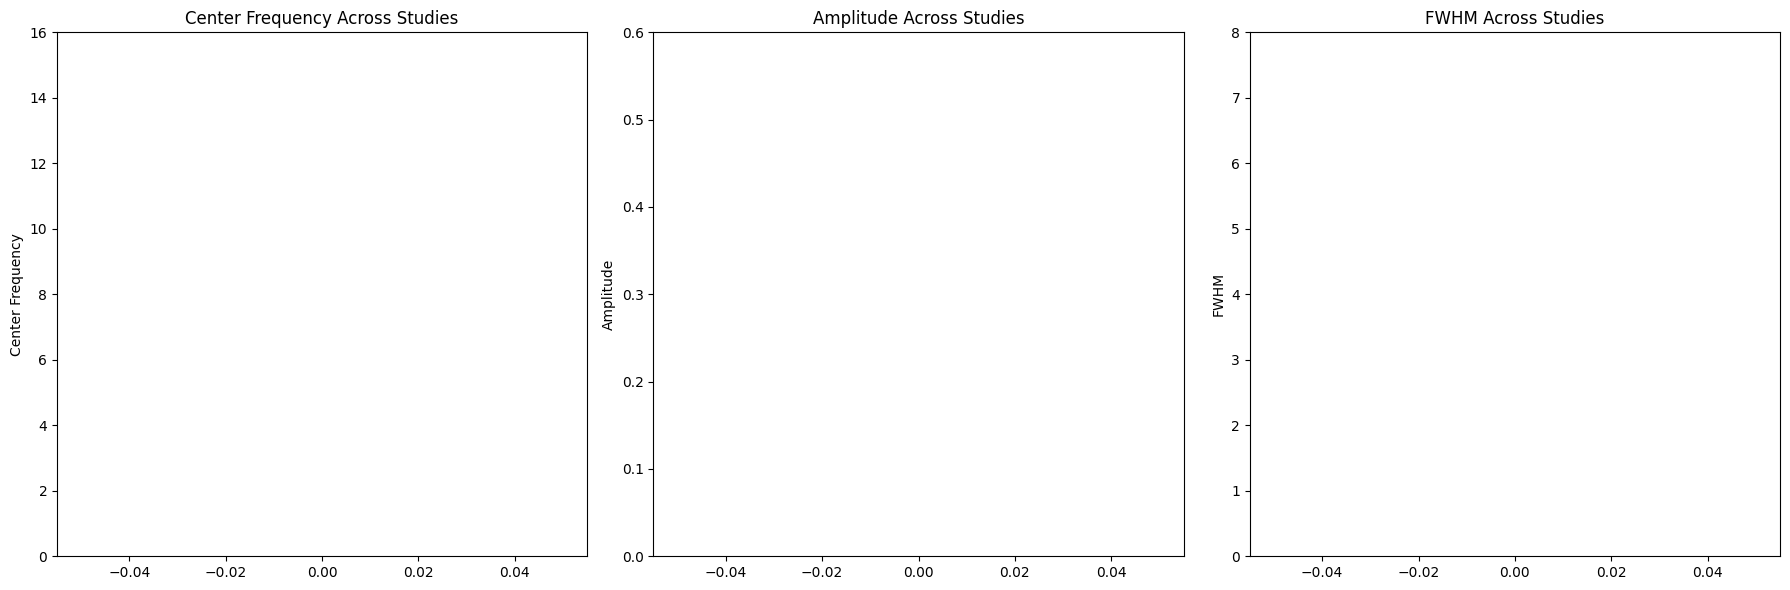

D:\Open Ephys\RD1 Chronic\Week 5\Analysis\Figures\Fitting_bargraphs\Chronic_Week_5_bargraphs


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the latest Excel file
file_path = r"D:\Open Ephys\RD1 Chronic\Week 5\Analysis\Figures\Chronic_Week_5_fooof_results.xlsx"
df = pd.read_excel(file_path)

# Trim whitespace from column names
df.columns = df.columns.str.strip()

# Define minimum frequency threshold (e.g., exclude peaks below 7 Hz)
min_freq = 7  # Adjust as needed

# Define study groups to include in the plot (modify as needed)
selected_study_groups = [("rd1", "Pilot")]  # Change to your desired groups

# Define parameters
parameters = ["Center Frequency", "Amplitude", "FWHM"]

# Set up the figure with subplots
fig, axes = plt.subplots(1, len(parameters), figsize=(18, 6), sharey=False)

# Loop through each parameter
for i, param in enumerate(parameters):
    ax = axes[i]
    means = []
    std_devs = []
    plot_data = []  # Store individual values
    labels = []  # Store x-axis labels

    # Iterate through selected study groups
    for group, study in selected_study_groups:
        df_filtered = df[(df["Group"] == group) & (df["Study"] == study)]
        
        # Apply frequency threshold
        df_filtered = df_filtered[df_filtered["Center Frequency"] >= min_freq]
        
        # Drop NaN values for correct calculations
        valid_values = df_filtered[param].dropna()
        
        if not valid_values.empty:
            mean_val = valid_values.mean()
            std_val = valid_values.std()

            means.append(mean_val)
            std_devs.append(std_val)
            plot_data.append(valid_values.values)
            labels.append(f"{group}\n{study}")

    # Create bar plot with manually computed error bars
    ax.bar(labels, means, yerr=std_devs, capsize=5, color="blue", alpha=0.4)

    # Overlay individual data points
    for j, data in enumerate(plot_data):
        x_vals = np.full_like(data, j, dtype=float)
        ax.scatter(x_vals, data, color="black", s=90, alpha=0.5)

    # Label plot
    ax.set_title(f"{param} Across Studies")
    ax.set_ylabel(param)
    
    # Set the y-axis limits so that there is no extra padding
    # and the maximum values are exactly as specified:
    if i == 0:
        ax.set_ylim(0, 16)
    elif i == 1:
        ax.set_ylim(0, 0.6)
    elif i == 2:
        ax.set_ylim(0, 8)

# Adjust layout
plt.tight_layout()

# Define SVG file path
svg_file_path = r"D:\Open Ephys\RD1 Chronic\Week 5\Analysis\Figures\Fitting_bargraphs\Chronic_Week_5_bargraphs"

# Export figure as SVG
plt.savefig(svg_file_path, format="svg")

# Show plot
plt.show()

# Provide the link to download the file
print(svg_file_path)


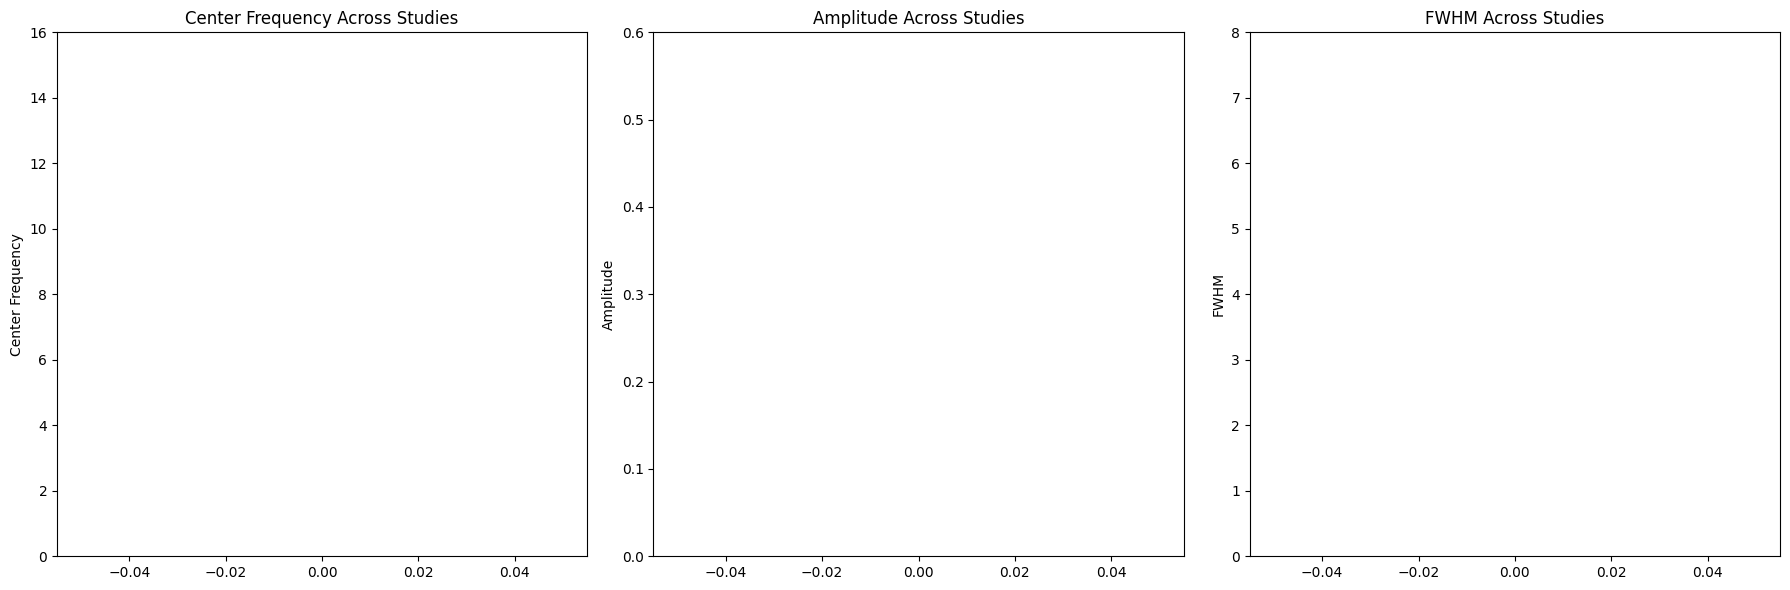

D:\Open Ephys\RD1 Chronic\Week 5\Analysis\Figures\Fitting_bargraphs\Chronic_Week_5_bargraphs


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the latest Excel file
file_path = r"D:\Open Ephys\RD1 Chronic\Week 5\Analysis\Figures\Chronic_Week_5_fooof_results.xlsx"
df = pd.read_excel(file_path)

# Trim whitespace from column names
df.columns = df.columns.str.strip()

# Define minimum frequency threshold (e.g., exclude peaks below 7 Hz)
min_freq = 7  # Adjust as needed

# Define study groups to include in the plot (modify as needed)
selected_study_groups = [("rd1", "Pilot")]  # Change to your desired groups

# Define parameters
parameters = ["Center Frequency", "Amplitude", "FWHM"]

# Set up the figure with subplots
fig, axes = plt.subplots(1, len(parameters), figsize=(18, 6), sharey=False)

# Loop through each parameter
for i, param in enumerate(parameters):
    ax = axes[i]
    means = []
    std_devs = []
    plot_data = []  # Store individual values
    labels = []  # Store x-axis labels

    # Iterate through selected study groups
    for group, study in selected_study_groups:
        df_filtered = df[(df["Group"] == group) & (df["Study"] == study)]
        
        # Apply frequency threshold
        df_filtered = df_filtered[df_filtered["Center Frequency"] >= min_freq]
        
        # Drop NaN values for correct calculations
        valid_values = df_filtered[param].dropna()
        
        if not valid_values.empty:
            mean_val = valid_values.mean()
            std_val = valid_values.std()

            means.append(mean_val)
            std_devs.append(std_val)
            plot_data.append(valid_values.values)
            labels.append(f"{group}\n{study}")

    # Create bar plot with manually computed error bars
    ax.bar(labels, means, yerr=std_devs, capsize=5, color="blue", alpha=0.4)

    # Overlay individual data points with added jitter to reduce overlap
    for j, data in enumerate(plot_data):
        # Generate a small random jitter for each point (adjust the range as needed)
        jitter = np.random.uniform(-0.1, 0.1, size=data.shape)
        x_vals = np.full_like(data, j, dtype=float) + jitter
        ax.scatter(x_vals, data, color="black", s=90, alpha=0.5)

    # Label plot
    ax.set_title(f"{param} Across Studies")
    ax.set_ylabel(param)
    
    # Set the y-axis limits so that there is no extra padding
    # and the maximum values are exactly as specified:
    if i == 0:
        ax.set_ylim(0, 16)
    elif i == 1:
        ax.set_ylim(0, 0.6)
    elif i == 2:
        ax.set_ylim(0, 8)

# Adjust layout
plt.tight_layout()

# Define SVG file path
svg_file_path = r"D:\Open Ephys\RD1 Chronic\Week 5\Analysis\Figures\Fitting_bargraphs\Chronic_Week_5_bargraphs"

# Export figure as SVG
plt.savefig(svg_file_path, format="svg")

# Show plot
plt.show()

# Provide the link to download the file
print(svg_file_path)


# 11)

In [ ]:
import os
print(os.path.exists("fooof_groups.pkl"))  # Should print True if the file exists


In [ ]:
def load_fooof_group(filename="fooof_groups.pkl"):
    with open(filename, "rb") as f:
        fg_dict = pickle.load(f)
    print(f"FOOOFGroup dictionary loaded from {filename}")
    return fg_dict

In [ ]:
import pickle
fg_dict = load_fooof_group("fooof_groups.pkl")
print(fg_dict.keys())  # Should display the keys of the loaded dictionary

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from collections import defaultdict
import re

##########################################
# 1) Extract FOOOF Parameters
##########################################
def extract_fooof_parameters(fg_dict, freq_range=(3, 45), amplitude_threshold=0.2):
    """
    Extract amplitude, center frequency, and FWHM data from each FOOOFGroup object in fg_dict.
    Only peaks within freq_range and amplitude >= amplitude_threshold are collected.
    Returns a dict of the form:
        extracted_data[fg_name]["amplitudes"] -> list of amplitudes
        extracted_data[fg_name]["center_frequencies"] -> list of center frequencies
        extracted_data[fg_name]["fwhms"] -> list of FWHMs
    """
    extracted_data = defaultdict(lambda: {"amplitudes": [], "center_frequencies": [], "fwhms": []})

    for fg_name, fg in fg_dict.items():
        num_channels = len(fg.power_spectra)

        for index in range(num_channels):
            fm = fg.get_fooof(ind=index, regenerate=True)
            if fm.has_data:
                for peak in fm.peak_params_:
                    # peak = [center_freq, amplitude, fwhm]
                    if freq_range[0] <= peak[0] <= freq_range[1] and peak[1] >= amplitude_threshold:
                        extracted_data[fg_name]["amplitudes"].append(peak[1])
                        extracted_data[fg_name]["center_frequencies"].append(peak[0])
                        extracted_data[fg_name]["fwhms"].append(peak[2])

    return extracted_data

##########################################
# 2) Parse (group, condition) from Key
##########################################
def parse_group_and_condition(fg_name_lower):
    """
    Given a lowercased FOOOFGroup key, return (group, condition) using these rules:

    group:
      - if 'chr' in name => 'chronic'
      - else if 'pt' in name => 'pilot'
      - else => 'other'

    condition:
      - if 'wt_' in name => 'wt'
      - else if 'rd1_' in name or 'rd1v' in name => 'rd1'
      - else => 'other'
    
    Examples:
      1) 'wt_118_Chr_W1_B4_Ey2_chronic&pilot...' => group='chronic' (found 'chr'), condition='wt'
      2) 'rd1_121_chr_W1_B1_Ey1'               => group='chronic', condition='rd1'
      3) 'rd1_56_Pt_B2_Ey1'                    => group='pilot',   condition='rd1'
    """
    # -------------- Group --------------
    if 'chr' in fg_name_lower:
        group = 'chronic'
    elif 'pt' in fg_name_lower:
        group = 'pilot'
    else:
        group = 'other'

    # -------------- Condition --------------
    if 'wt_' in fg_name_lower:
        condition = 'wt'
    elif 'rd1_' in fg_name_lower or 'rd1v' in fg_name_lower:
        condition = 'rd1'
    else:
        condition = 'other'

    return (group, condition)

##########################################
# 3) Advanced Line Plot Function
##########################################
def advanced_line_plot(
    extracted_data,
    parameter,
    groups_to_include,      # e.g. ['chronic', 'pilot', 'other']
    conditions_to_include,  # e.g. ['wt', 'rd1', 'other']
    show_individual=True,
    circle_size=30,
    single_figure=True,
):
    """
    Plots mean ± std lines across blocks for each (group, condition),
    plus optional individual lines. Missing data => 0 on the plot, not connected by lines.
    If single_figure=False, each (group, condition) is in a separate subplot.

    Steps:
      1) We parse each key's group & condition (using parse_group_and_condition).
      2) If block is found as _B(\d+), we place data at that block index.
      3) Missing => 0, but for the line we turn 0 => NaN (to break the line).
      4) We show each instance's line if requested, plus a mean ± std line.
    """

    from collections import defaultdict

    # 1) Build data structure => data_dict[(group, condition)][fg_name] -> list of (b_num, vals)
    data_dict = defaultdict(lambda: defaultdict(list))
    max_block_index = 0

    for fg_name, param_dict in extracted_data.items():
        fg_name_lower = fg_name.lower()
        group, condition = parse_group_and_condition(fg_name_lower)
        if (group in groups_to_include) and (condition in conditions_to_include):
            match = re.search(r"_b(\d+)", fg_name_lower)
            if match:
                b_num = int(match.group(1))
                if b_num > max_block_index:
                    max_block_index = b_num
            else:
                # no block => skip for line plot
                continue

            # gather parameter array
            vals = param_dict[parameter]
            data_dict[(group, condition)][fg_name].append((b_num, vals))

    if max_block_index == 0:
        print("No blocks found in these data. Nothing to plot.")
        return

    # 2) Prepare subplots if single_figure=False
    if single_figure:
        fig, ax = plt.subplots(figsize=(8, 5))
        axes = [(None, ax)]
    else:
        # figure out how many combos are actually present
        combos_in_data = []
        for combo, val in data_dict.items():
            if len(val) > 0:
                combos_in_data.append(combo)
        n_plots = len(combos_in_data)
        if n_plots == 0:
            print("No group/condition combos found in data.")
            return
        cols = min(n_plots, 2)
        rows = (n_plots + cols - 1) // cols
        fig, axes_arr = plt.subplots(rows, cols, figsize=(5*cols, 4*rows), sharex=True, sharey=True)

        if rows == 1 and cols == 1:
            axes_arr = np.array([[axes_arr]])
        elif rows == 1 or cols == 1:
            axes_arr = axes_arr.reshape(rows, cols)

        axes = []
        idx = 0
        for r in range(rows):
            for c in range(cols):
                if idx < n_plots:
                    combo = combos_in_data[idx]
                    axes.append((combo, axes_arr[r, c]))
                else:
                    axes_arr[r, c].axis("off")
                idx += 1

    # 3) Color map - tweak as you like
    color_map = {
        "chronic": "blue",
        "pilot": "orange",
        "other": "gray"
    }

    # 4) Plot each (group, condition) combo
    for (combo, ax) in axes:
        if combo is None:
            continue
        (group, condition) = combo

        instance_arrays = []
        # data_dict[combo] => dict of { fg_name: [ (b_num, vals), ... ] }
        for fg_name, blockvals_list in data_dict[combo].items():
            arr = np.zeros(max_block_index, dtype=float)
            for (b_num, vals) in blockvals_list:
                if len(vals) > 0:
                    arr[b_num - 1] = np.mean(vals)
                else:
                    arr[b_num - 1] = 0.0
            instance_arrays.append(arr)

        if len(instance_arrays) == 0:
            continue

        big_arr = np.vstack(instance_arrays)  # shape (#instances, max_block_index)

        # Plot each instance line
        if show_individual:
            for row_i in range(big_arr.shape[0]):
                line_arr = np.copy(big_arr[row_i, :])
                line_arr_for_conn = np.where(line_arr == 0.0, np.nan, line_arr)
                x_vals = np.arange(1, max_block_index + 1)
                color = color_map.get(group, "black")
                ax.plot(x_vals, line_arr_for_conn, '--', alpha=0.3, color=color, linewidth=1)
                # Mark each point
                ax.scatter(x_vals, line_arr, s=circle_size, facecolor=color, edgecolor='black', alpha=0.8)

        # group mean ± std
        mean_vals = np.mean(big_arr, axis=0)
        std_vals = np.std(big_arr, axis=0)
        line_mean = np.where(mean_vals == 0.0, np.nan, mean_vals)
        x_vals = np.arange(1, max_block_index + 1)
        label_for_legend = f"{group}_{condition}"
        color = color_map.get(group, "black")
        ax.errorbar(
            x_vals, line_mean, yerr=std_vals,
            marker='o', markersize=circle_size/6, capsize=4,
            label=label_for_legend, color=color
        )

        ax.set_xticks(x_vals)
        ax.set_xticklabels([f"B{i}" for i in range(1, max_block_index + 1)])
        ax.set_xlabel("Blocks")
        ax.set_ylabel(parameter.capitalize())
        if single_figure:
            ax.set_title(f"{parameter.capitalize()} Over Blocks")
        else:
            ax.set_title(f"{group.upper()}_{condition.upper()} - {parameter.capitalize()}", fontsize=11)

    # 5) Legend outside
    if single_figure:
        ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0, fontsize='small')
        plt.tight_layout(rect=[0, 0, 0.8, 1])
        plt.show()
    else:
        for (combo, ax) in axes:
            if combo is not None:
                ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0, fontsize='small')
        plt.tight_layout(rect=[0, 0, 0.8, 1])
        plt.show()

##########################################
# 4) A GUI to Use This Advanced Plot
##########################################
def fooof_gui_advanced(fg_dict):
    """
    Creates a GUI that allows you to:
      - choose parameter (amplitudes, center_frequencies, fwhms)
      - select which groups to plot (chronic, pilot, other)
      - select which conditions to plot (wt, rd1, other)
      - pick circle size
      - pick single figure or separate subplots
      - toggle show individual lines
      - then produce the advanced line plot with missing => 0, not connected by lines
    """

    # Extract data once
    extracted_data = extract_fooof_parameters(fg_dict)

    # Possible group and condition options based on your new rules
    group_options = ["chronic", "pilot", "other"]
    condition_options = ["wt", "rd1", "other"]

    # GUI widgets
    parameter_dropdown = widgets.Dropdown(
        options=["amplitudes", "center_frequencies", "fwhms"],
        value="amplitudes",
        description="Parameter:"
    )
    group_select = widgets.SelectMultiple(
        options=group_options,
        value=("chronic", "pilot", "other"),  # default all
        description="Groups:"
    )
    cond_select = widgets.SelectMultiple(
        options=condition_options,
        value=("wt", "rd1", "other"),  # default all
        description="Conditions:"
    )
    circle_size_slider = widgets.IntSlider(
        value=30,
        min=5,
        max=100,
        step=5,
        description="Circle Size:"
    )
    show_indiv_checkbox = widgets.Checkbox(
        value=True,
        description="Show Indiv Lines"
    )
    single_fig_checkbox = widgets.Checkbox(
        value=True,
        description="Single Figure?"
    )
    run_button = widgets.Button(
        description="Plot",
        button_style="success",
        icon="check"
    )
    output = widgets.Output()

    # On run
    def on_run_click(b):
        with output:
            output.clear_output()

            param = parameter_dropdown.value
            groups_sel = list(group_select.value)
            cond_sel = list(cond_select.value)
            circ_size = circle_size_slider.value
            show_indiv = show_indiv_checkbox.value
            single_fig = single_fig_checkbox.value

            advanced_line_plot(
                extracted_data=extracted_data,
                parameter=param,
                groups_to_include=groups_sel,
                conditions_to_include=cond_sel,
                show_individual=show_indiv,
                circle_size=circ_size,
                single_figure=single_fig,
            )

    run_button.on_click(on_run_click)

    controls = widgets.VBox([
        parameter_dropdown,
        group_select,
        cond_select,
        circle_size_slider,
        show_indiv_checkbox,
        single_fig_checkbox,
        run_button
    ])
    display(widgets.VBox([controls, output]))

# Example usage:
fooof_gui_advanced(fg_dict)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from collections import defaultdict
import re  # For regular expressions

# ---------------------------------------------------------
# 1) Extracting FOOOF Parameters - Unchanged
# ---------------------------------------------------------
def extract_fooof_parameters(fg_dict, freq_range=(3, 45), amplitude_threshold=0.2):
    """
    Extract amplitude, center frequency, and FWHM data from each FOOOFGroup object in fg_dict.
    Only peaks within freq_range and amplitude >= amplitude_threshold are collected.
    Returns a dict of the form:
        extracted_data[fg_name]["amplitudes"] -> list of amplitudes
        extracted_data[fg_name]["center_frequencies"] -> list of center frequencies
        extracted_data[fg_name]["fwhms"] -> list of FWHMs
    """
    extracted_data = defaultdict(lambda: {"amplitudes": [], "center_frequencies": [], "fwhms": []})

    for fg_name, fg in fg_dict.items():
        num_channels = len(fg.power_spectra)

        for index in range(num_channels):
            fm = fg.get_fooof(ind=index, regenerate=True)

            if fm.has_data:
                for peak in fm.peak_params_:
                    # peak = [center_freq, amplitude, fwhm]
                    if freq_range[0] <= peak[0] <= freq_range[1] and peak[1] >= amplitude_threshold:
                        extracted_data[fg_name]["amplitudes"].append(peak[1])
                        extracted_data[fg_name]["center_frequencies"].append(peak[0])
                        extracted_data[fg_name]["fwhms"].append(peak[2])

    return extracted_data


# ---------------------------------------------------------
# 2) Plotting Data
# ---------------------------------------------------------
def plot_line_data(
    extracted_data,
    parameter,
    selected_patterns,
    show_individual_lines=True,
):
    """
    Plots lines for the given parameter across blocks (e.g., B1, B2, B3...),
    with optional mean/std overlay.

    Approach:
    1. For each key in extracted_data that matches any pattern in selected_patterns,
       parse the block number from `_B(\d+)`.
    2. Compute the mean of the parameter for that key (or multiple values).
    3. Place that mean in the array at index = (block_number - 1).
    4. Plot individual lines (if show_individual_lines=True) and then the mean ± std across them.
    """

    # We'll gather data in all_values_for_pattern[pattern], 
    # which will be a list of arrays (one array per matched FOOOFGroup).
    # Each array length depends on the max block index found, to keep them consistent.
    all_values_for_pattern = defaultdict(list)

    # 1) Identify the maximum block index we might see across all keys
    max_block_index = 0
    for fg_name in extracted_data.keys():
        # Look for `_B(\d+)`
        match = re.search(r"_B(\d+)", fg_name)
        if match:
            b_num = int(match.group(1))
            if b_num > max_block_index:
                max_block_index = b_num

    # Edge case: if no blocks found, there's nothing to plot
    if max_block_index == 0:
        print("No blocks (B1, B2, etc.) found in these patterns. Nothing to line-plot.")
        return

    # For each pattern selected, find matches in extracted_data
    for fg_name, data_dict in extracted_data.items():
        for pattern in selected_patterns:
            if pattern in fg_name:
                # parse block number
                match = re.search(r"_B(\d+)", fg_name)
                if match:
                    b_num = int(match.group(1))
                    if b_num <= 0:
                        continue
                    # compute the mean of data_dict[parameter] for that key
                    vals = np.array(data_dict[parameter])
                    if len(vals) > 0:
                        this_avg = np.mean(vals)
                    else:
                        this_avg = np.nan

                    # We'll create an array of length max_block_index, fill with NaN
                    # Then place this_avg at index = b_num - 1
                    arr = np.full(max_block_index, np.nan)
                    arr[b_num - 1] = this_avg
                    all_values_for_pattern[pattern].append(arr)

    # Now we have for each pattern a list of arrays => shape (#recordings, max_block_index)
    plt.figure(figsize=(8, 5))

    # Optionally plot each subject line
    if show_individual_lines:
        for pattern, array_list in all_values_for_pattern.items():
            for arr in array_list:
                arr_for_plot = np.nan_to_num(arr, nan=0.0)
                x = np.arange(1, max_block_index + 1)
                plt.plot(x, arr_for_plot, 'o--', alpha=0.4)

    # Plot mean ± std
    for pattern, array_list in all_values_for_pattern.items():
        if len(array_list) == 0:
            continue
        big_arr = np.vstack(array_list)  # shape = (#recordings, max_block_index)
        mean_vals = np.nanmean(big_arr, axis=0)
        std_vals = np.nanstd(big_arr, axis=0)

        x = np.arange(1, max_block_index + 1)
        plt.errorbar(x, mean_vals, yerr=std_vals, capsize=5, label=f"{pattern} (mean ± std)")

    # X-axis: 1..max_block_index
    plt.xticks(np.arange(1, max_block_index + 1), [f"B{i}" for i in range(1, max_block_index + 1)])
    plt.xlabel("Block")
    plt.ylabel(parameter.capitalize())
    plt.title(f"{parameter.capitalize()} (Line Plot)")
    plt.legend()
    plt.tight_layout()
    plt.show()


def plot_bar_data(
    extracted_data,
    parameter,
    selected_patterns,
    bar_colors=None
):
    """
    Plots bar graphs for patterns that do NOT contain blocks in their names.
    We'll interpret "non-block" as: no `_B(\d+)` in the fg_name.
    Each pattern -> single bar with mean ± std.
    """

    # We'll gather all values from each pattern in a big list, ignoring any that have _B\d+
    pattern_values = defaultdict(list)

    for fg_name, data_dict in extracted_data.items():
        # If there's a block match, skip (we only want non-block here)
        if re.search(r"_B(\d+)", fg_name):
            continue

        for pattern in selected_patterns:
            if pattern in fg_name:
                pattern_values[pattern].extend(data_dict[parameter])

    # Compute means and stds
    final_patterns = sorted(list(pattern_values.keys()))
    means = []
    stds = []
    for pattern in final_patterns:
        vals = np.array(pattern_values[pattern])
        if len(vals) > 0:
            means.append(np.nanmean(vals))
            stds.append(np.nanstd(vals))
        else:
            means.append(0.0)
            stds.append(0.0)

    # Make bar plot
    x = np.arange(len(final_patterns))
    plt.figure(figsize=(8, 5))

    if bar_colors is None:
        bar_colors = {}
    colors_to_use = []
    for i, pat in enumerate(final_patterns):
        if isinstance(bar_colors, dict):
            colors_to_use.append(bar_colors.get(pat, "gray"))
        elif isinstance(bar_colors, list) and i < len(bar_colors):
            colors_to_use.append(bar_colors[i])
        else:
            colors_to_use.append("gray")

    plt.bar(x, means, yerr=stds, capsize=5, color=colors_to_use, alpha=0.7)
    plt.xticks(x, final_patterns, rotation=45, ha="right")
    plt.ylabel(parameter.capitalize())
    plt.title(f"{parameter.capitalize()} (Bar Plot)")
    plt.tight_layout()
    plt.show()


# ---------------------------------------------------------
# 3) GUI
# ---------------------------------------------------------
def fooof_gui(fg_dict):
    """
    Creates a GUI that lets you:
    - Select which parameter (amplitudes, center_frequencies, fwhms)
    - Select plot type (Bar or Line)
    - Choose which patterns to consider for line plots (those containing blocks, e.g. _B1_)
    - Choose which patterns to consider for bar plots (those lacking _B\d+_)
    - Toggle whether to show individual lines in the line plot
    - Pick a color for bar plots
    """

    # 3.1) Basic data extraction
    extracted_data = extract_fooof_parameters(fg_dict)

    # 3.2) Identify all possible keys
    all_keys = list(extracted_data.keys())

    # "Block-like" if `_B(\d+)` is found
    block_like = []
    non_block_like = []
    for k in all_keys:
        if re.search(r"_B(\d+)", k):
            block_like.append(k)
        else:
            non_block_like.append(k)

    block_like = sorted(block_like)
    non_block_like = sorted(non_block_like)

    # 3.3) Widgets
    parameter_dropdown = widgets.Dropdown(
        options=["amplitudes", "center_frequencies", "fwhms"],
        value="amplitudes",
        description="Parameter:"
    )
    plot_type_dropdown = widgets.Dropdown(
        options=["Bar", "Line"],
        value="Line",
        description="Plot Type:"
    )
    block_select = widgets.SelectMultiple(
        options=block_like,
        description="Block Patterns:",
        layout=widgets.Layout(height="320px", width="100%")
    )
    other_select = widgets.SelectMultiple(
        options=non_block_like,
        description="Non-Block Patterns:",
        layout=widgets.Layout(height="320px", width="100%")
    )
    show_lines_checkbox = widgets.Checkbox(
        value=True, description="Show Indiv Lines"
    )
    bar_color_picker = widgets.ColorPicker(
        description="Bar Color:",
        value="#1f77b4"
    )
    run_button = widgets.Button(
        description="Run",
        button_style="success",
        icon="check"
    )
    output = widgets.Output()

    # 3.4) On click
    def on_run_button_click(b):
        with output:
            output.clear_output()

            parameter = parameter_dropdown.value
            plot_type = plot_type_dropdown.value
            selected_block_patterns = list(block_select.value)
            selected_other_patterns = list(other_select.value)
            show_individual_lines = show_lines_checkbox.value
            picked_color = bar_color_picker.value

            if plot_type == "Line":
                # We line-plot block patterns (which contain `_B\d+_`)
                if len(selected_block_patterns) == 0:
                    print("No block patterns selected. Nothing to plot.")
                    return
                print(f"Plotting LINE for: {selected_block_patterns}")
                plot_line_data(
                    extracted_data,
                    parameter,
                    selected_block_patterns,
                    show_individual_lines=show_individual_lines
                )
            else:
                # Bar plot for patterns that do NOT contain `_B\d+_`
                if len(selected_other_patterns) == 0:
                    print("No non-block patterns selected. Nothing to plot.")
                    return
                print(f"Plotting BAR for: {selected_other_patterns}")
                # Single color or expand as needed
                bar_colors = [picked_color] * len(selected_other_patterns)

                plot_bar_data(
                    extracted_data,
                    parameter,
                    selected_other_patterns,
                    bar_colors=bar_colors
                )

    run_button.on_click(on_run_button_click)

    # 3.5) Layout
    controls = widgets.VBox([
        parameter_dropdown,
        plot_type_dropdown,
        widgets.HBox([
            widgets.VBox([block_select, show_lines_checkbox]),
            widgets.VBox([other_select, bar_color_picker]),
        ]),
        run_button
    ])
    display(widgets.VBox([controls, output]))

fooof_gui(fg_dict)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from collections import defaultdict

# -----------------
# Utility to parse FOOOFGroup names into (block, eye, mouse).
# Assumes names are of form 'blockX_eyeY_rd1_Z...' 
# or at least contain 'block', 'eye', 'rd1' in underscore-delimited parts.
# Adjust as needed for your naming convention.
# -----------------
def parse_fg_name(fg_name):
    """
    Attempt to parse something like: 'block1_eye2_rd1_56'
    Returns: (block, eye, mouse) 
      e.g. ('block1', 'eye2', 'rd1_56')
    If it doesn't match the pattern, returns (None, None, None).
    """
    parts = fg_name.split('_')  # e.g. ['block1','eye2','rd1','56']
    # We'll do a simple heuristic:
    block, eye, mouse = None, None, None
    
    # Find 'blockX' in parts
    block_part = [p for p in parts if p.lower().startswith('block')]
    eye_part   = [p for p in parts if p.lower().startswith('eye')]
    # For the mouse, sometimes it's "rd1_56", so we might look for 'rd1' + the next part.
    # We'll do a simple approach: locate 'rd1' or 'rd2' etc. and join it with the next part if numeric.
    
    # block
    if block_part:
        block = block_part[0]
    # eye
    if eye_part:
        eye = eye_part[0]
    # mouse
    # We look for the index of 'rd1', 'rd2', etc. (or 'rdX') in parts
    # Then combine the part plus the next one if the next one is numeric
    mouse_idx = None
    for i, p in enumerate(parts):
        if p.lower().startswith('rd'):
            mouse_idx = i
            break
    if mouse_idx is not None:
        # e.g., p = 'rd1', next part = '56'
        if mouse_idx + 1 < len(parts):
            # combine them into "rd1_56"
            mouse = parts[mouse_idx] + "_" + parts[mouse_idx+1]
        else:
            # just "rd1"
            mouse = parts[mouse_idx]
    
    return block, eye, mouse


def extract_fooof_parameters(fg_dict, freq_range=(4, 45), amplitude_threshold=0.15):
    """
    Extract amplitude, center frequency, and FWHM data from each FOOOFGroup object in fg_dict.
    Only peaks within freq_range and amplitude >= amplitude_threshold are collected.
    Returns a dict of the form:
        extracted_data[fg_name]["amplitudes"] -> list of amplitudes
        extracted_data[fg_name]["center_frequencies"] -> list of center frequencies
        extracted_data[fg_name]["fwhms"] -> list of FWHMs
    """
    from collections import defaultdict
    extracted_data = defaultdict(lambda: {"amplitudes": [], "center_frequencies": [], "fwhms": []})

    for fg_name, fg in fg_dict.items():
        num_channels = len(fg.power_spectra)

        for index in range(num_channels):
            fm = fg.get_fooof(ind=index, regenerate=True)

            if fm.has_data:
                for peak in fm.peak_params_:
                    # peak = [center_freq, amplitude, fwhm]
                    if freq_range[0] <= peak[0] <= freq_range[1] and peak[1] >= amplitude_threshold:
                        extracted_data[fg_name]["amplitudes"].append(peak[1])
                        extracted_data[fg_name]["center_frequencies"].append(peak[0])
                        extracted_data[fg_name]["fwhms"].append(peak[2])

    return extracted_data


# -----------------
# Hierarchical Line Plot
# -----------------
def plot_hierarchical_line(
    extracted_data,
    parameter,
    title=None,
    save_path=None
):
    """
    Hierarchically group FOOOF data by:
      1) Mouse (rd1_56, rd1_58, etc.)
      2) Eye (eye1, eye2, etc.)
      3) Block (block1...blockN)
    Then plot each (mouse, eye) as one line across blocks, with:
      - Circles at each block's value
      - 0 for missing block, shown as a circle, but no line connection at that point
    If save_path is not None (and not empty), the figure is saved.
    """

    # data_hier[mouse][eye][block] = list of param values
    data_hier = defaultdict(lambda: defaultdict(lambda: defaultdict(list)))

    # Parse each fg_name, fill data_hier
    for fg_name, param_dict in extracted_data.items():
        block, eye, mouse = parse_fg_name(fg_name)
        if block is None or eye is None or mouse is None:
            # If we can't parse, skip or store under some fallback
            continue
        values = param_dict[parameter]
        if len(values) == 0:
            continue
        # You might average the values if there are multiple channels
        # Or store them all; let's just store them all, then take the mean
        data_hier[mouse][eye][block].extend(values)

    plt.figure(figsize=(8, 5))

    # For each mouse, for each eye, gather blocks in ascending order
    for mouse in sorted(data_hier.keys()):
        for eye in sorted(data_hier[mouse].keys()):
            # Collect blocks in numerical order: block1, block2, etc.
            blocks_list = sorted(
                data_hier[mouse][eye].keys(),
                key=lambda x: int(x.lower().replace("block", ""))  # parse the block number
            )

            # Build y-values, one per block
            y_vals = []
            for blk in blocks_list:
                vals = data_hier[mouse][eye][blk]
                if len(vals) > 0:
                    y_vals.append(np.mean(vals))
                else:
                    y_vals.append(np.nan)

            if not blocks_list:
                # no blocks, skip
                continue

            x_vals = np.arange(1, len(blocks_list) + 1, 1)

            # We want to plot:
            #   1) A line ignoring missing data (np.nan).
            #   2) Circles for every block. If y is missing => 0 for the circle, but no line continuity.
            y_line = np.array(y_vals, dtype=float)
            # We'll create a separate array for scatter:
            y_scatter = np.copy(y_line)
            # missing means np.nan
            missing_mask = np.isnan(y_line)
            # put zeros for missing in scatter:
            y_scatter[missing_mask] = 0.0

            # The line: we keep np.nan for missing => Matplotlib won't connect across them.
            # Plot the line first (without markers).
            plt.plot(
                x_vals,
                y_line,
                linestyle='-',
                marker='',
                label=f"{mouse}, {eye}",
            )
            # Then the scatter: 
            # For *all* x, we place circles. Non-missing => actual value, missing => 0
            # so visually you see a circle at 0 if missing.
            plt.scatter(
                x_vals,
                y_scatter,
                s=40
            )

    # Some final labeling
    if title:
        plt.title(title)
    else:
        plt.title(f"{parameter.capitalize()} (Hierarchical Line Plot)")

    plt.xlabel("Block #")
    plt.ylabel(parameter.capitalize())

    # Build x-ticks from the largest number of blocks we might have
    # Or keep it minimal if you'd like. If you assume max of 6 blocks:
    max_blocks = 0
    for mouse in data_hier.keys():
        for eye in data_hier[mouse].keys():
            nb = len(data_hier[mouse][eye].keys())
            if nb > max_blocks:
                max_blocks = nb
    x_tick_labels = [f"block{i}" for i in range(1, max_blocks + 1)]
    x_positions = np.arange(1, max_blocks + 1, 1)

    plt.xticks(x_positions, x_tick_labels, rotation=0)

    # If we have many lines, the legend can get big. Let’s place it outside or set bounding box:
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()

    # Save the plot if user requested
    if save_path is not None and len(save_path.strip()) > 0:
        plt.savefig(save_path, dpi=300)
        print(f"Figure saved to: {save_path}")

    plt.show()


# -----------------
# Existing Bar Plot
# -----------------
def plot_bar_data(
    extracted_data,
    parameter,
    selected_patterns,
    bar_colors=None,
    save_path=None
):
    """
    Plots bar graphs for patterns that do NOT contain 'block' in their names (per your requirement).
    Each pattern -> single bar with mean, std as error bar.
    bar_colors: optional dict or list specifying the color for each pattern.
    If save_path is provided (non-empty), saves the figure.
    """

    # Filter out patterns that contain "block", as required
    final_patterns = [p for p in selected_patterns if "block" not in p.lower()]

    # Gather data
    pattern_values = defaultdict(list)
    for fg_name, data_dict in extracted_data.items():
        for pattern in final_patterns:
            if pattern in fg_name:
                pattern_values[pattern].extend(data_dict[parameter])

    # For each pattern, compute mean and std
    means = []
    stds = []
    for pattern in final_patterns:
        vals = np.array(pattern_values[pattern])
        if len(vals) > 0:
            means.append(np.nanmean(vals))
            stds.append(np.nanstd(vals))
        else:
            means.append(0.0)
            stds.append(0.0)

    x = np.arange(len(final_patterns))
    plt.figure(figsize=(8, 5))

    if bar_colors is None:
        bar_colors = {}

    colors_to_use = []
    if isinstance(bar_colors, dict):
        for pat in final_patterns:
            colors_to_use.append(bar_colors.get(pat, "gray"))
    elif isinstance(bar_colors, list):
        for i, pat in enumerate(final_patterns):
            if i < len(bar_colors):
                colors_to_use.append(bar_colors[i])
            else:
                colors_to_use.append("gray")
    else:
        colors_to_use = ["gray"] * len(final_patterns)

    plt.bar(x, means, yerr=stds, capsize=5, color=colors_to_use, alpha=0.7)
    plt.xticks(x, final_patterns, rotation=45, ha="right")
    plt.ylabel(parameter.capitalize())
    plt.title(f"{parameter.capitalize()} (Bar Plot)")
    plt.ylim(0,30)
    plt.tight_layout()

    if save_path is not None and len(save_path.strip()) > 0:
        plt.savefig(save_path, dpi=300)
        print(f"Bar plot saved to: {save_path}")

    plt.show()


# -----------------
# A GUI that combines everything
# -----------------
def fooof_gui(fg_dict):
    """
    Creates a GUI that lets you:
    - Select which parameter (amplitudes, center_frequencies, fwhms)
    - Select plot type (Bar or Hierarchical Line)
    - Select patterns for bar plots or just rely on hierarchical line for all data
    - Provide a filename to export the figure
    - ...
    """

    # Pre-extract all data so we don't re-run FOOOF each time
    extracted_data = extract_fooof_parameters(fg_dict)

    # Identify all keys
    all_keys = list(extracted_data.keys())

    # Separate block-like keys vs. non-block
    block_like = sorted([k for k in all_keys if "block" in k.lower()])
    non_block_like = sorted([k for k in all_keys if "block" not in k.lower()])

    # Widgets
    parameter_dropdown = widgets.Dropdown(
        options=["amplitudes", "center_frequencies", "fwhms"],
        description="Parameter:"
    )
    plot_type_dropdown = widgets.Dropdown(
        options=["Hierarchical Line", "Bar"],
        description="Plot Type:"
    )
    bar_select = widgets.SelectMultiple(
        options=non_block_like,
        description="Bar Patterns:",
        layout=widgets.Layout(height="150px")
    )
    color_picker = widgets.ColorPicker(
        description="Bar Color:",
        value="#1f77b4"
    )
    save_plot_checkbox = widgets.Checkbox(
        value=False,
        description="Save Plot?"
    )
    save_filename_input = widgets.Text(
        value="",
        description="Filename:"
    )
    run_button = widgets.Button(
        description="Run",
        button_style="success",
        icon="check"
    )
    output = widgets.Output()

    # Button callback
    def on_run_button_click(b):
        with output:
            output.clear_output()

            parameter = parameter_dropdown.value
            plot_type = plot_type_dropdown.value
            bar_patterns = list(bar_select.value)
            do_save = save_plot_checkbox.value
            filename = save_filename_input.value.strip()

            if plot_type == "Hierarchical Line":
                print("Plotting Hierarchical Line ...")
                plot_hierarchical_line(
                    extracted_data,
                    parameter=parameter,
                    title=f"{parameter.capitalize()} (Hierarchical Line Plot)",
                    save_path=filename if do_save else None
                )

            elif plot_type == "Bar":
                if not bar_patterns:
                    print("No bar patterns selected. Nothing to plot.")
                    return
                print("Plotting Bar Chart ...")
                # Single color for all selected patterns
                bar_colors = [color_picker.value] * len(bar_patterns)
                plot_bar_data(
                    extracted_data,
                    parameter=parameter,
                    selected_patterns=bar_patterns,
                    bar_colors=bar_colors,
                    save_path=filename if do_save else None
                )

    run_button.on_click(on_run_button_click)

    # Layout
    controls = widgets.VBox([
        parameter_dropdown,
        plot_type_dropdown,
        widgets.HBox([bar_select, color_picker]),
        widgets.HBox([save_plot_checkbox, save_filename_input]),
        run_button
    ])

    display(widgets.VBox([controls, output]))


# Example usage (in a notebook):
fooof_gui(fg_dict)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from collections import defaultdict

# -----------------
# Utility to parse FOOOFGroup names into (block, eye, mouse).
# Adjust for your naming convention as needed.
# -----------------
def parse_fg_name(fg_name):
    """
    Attempt to parse something like: 'block1_eye2_rd1_56'
    Returns: (block, eye, mouse) 
      e.g. ('block1', 'eye2', 'rd1_56')
    If it doesn't match the pattern, returns (None, None, None).
    """
    parts = fg_name.split('_')  # e.g. ['block1','eye2','rd1','56']
    block, eye, mouse = None, None, None
    
    # Find 'blockX' in parts
    block_part = [p for p in parts if p.lower().startswith('block')]
    eye_part = [p for p in parts if p.lower().startswith('eye')]
    
    if block_part:
        block = block_part[0]
    if eye_part:
        eye = eye_part[0]

    # find 'rdX' in parts
    mouse_idx = None
    for i, p in enumerate(parts):
        if p.lower().startswith('rd'):
            mouse_idx = i
            break
    if mouse_idx is not None:
        # e.g. 'rd1' plus '56'
        if mouse_idx + 1 < len(parts):
            mouse = parts[mouse_idx] + "_" + parts[mouse_idx+1]
        else:
            mouse = parts[mouse_idx]
    
    return block, eye, mouse


def extract_fooof_parameters(fg_dict, freq_range=(4, 45), amplitude_threshold=0.15):
    """
    Extract amplitude, center frequency, and FWHM data from each FOOOFGroup object in fg_dict.
    Only peaks within freq_range and amplitude >= amplitude_threshold are collected.
    Returns a dict of the form:
        extracted_data[fg_name]["amplitudes"] -> list of amplitudes
        extracted_data[fg_name]["center_frequencies"] -> list of center frequencies
        extracted_data[fg_name]["fwhms"] -> list of FWHMs
    """
    from collections import defaultdict
    extracted_data = defaultdict(lambda: {"amplitudes": [], "center_frequencies": [], "fwhms": []})

    for fg_name, fg in fg_dict.items():
        num_channels = len(fg.power_spectra)

        for index in range(num_channels):
            fm = fg.get_fooof(ind=index, regenerate=True)

            if fm.has_data:
                for peak in fm.peak_params_:
                    # peak = [center_freq, amplitude, fwhm]
                    if freq_range[0] <= peak[0] <= freq_range[1] and peak[1] >= amplitude_threshold:
                        extracted_data[fg_name]["amplitudes"].append(peak[1])
                        extracted_data[fg_name]["center_frequencies"].append(peak[0])
                        extracted_data[fg_name]["fwhms"].append(peak[2])

    return extracted_data


# -----------------
# Hierarchical Line Plot with user options:
#   - show_mean: bool => whether to show the overall mean/std across all lines
#   - show_individual: bool => whether to show the individual lines
#   - connect_points: bool => whether to connect circles with lines
#   - y_range: tuple => (ymin, ymax) if not None
#   - line_color: color string or None => color for all lines (if not None),
#       otherwise a color cycle is used.
#   - mean_color: color string => color for the mean line
# -----------------
def plot_hierarchical_line(
    extracted_data,
    parameter,
    show_mean=True,
    show_individual=True,
    connect_points=True,
    y_range=None,
    line_color=None,
    mean_color='#FF0000',  # default is red for the mean
    title=None,
    save_path=None
):
    """
    Hierarchically group FOOOF data by (mouse -> eye -> block).
    Plot each (mouse, eye) across blocks. Missing data = circle at 0, 
    but no line is drawn across missing data (np.nan breaks the line).
    Optionally plot the grand mean across all lines with std shading or error bars.
    """
    # data_hier[mouse][eye][block] = list of param values
    data_hier = defaultdict(lambda: defaultdict(lambda: defaultdict(list)))

    # Parse each fg_name, fill data_hier
    for fg_name, param_dict in extracted_data.items():
        block, eye, mouse = parse_fg_name(fg_name)
        if block is None or eye is None or mouse is None:
            # If we can't parse, skip or store under some fallback
            continue
        values = param_dict[parameter]
        if len(values) == 0:
            continue
        # store them all, then take mean
        data_hier[mouse][eye][block].extend(values)

    # Determine max number of blocks so we can align x-positions
    all_block_names = set()
    for mouse in data_hier.keys():
        for eye in data_hier[mouse].keys():
            all_block_names.update(data_hier[mouse][eye].keys())
    # Example: block1, block2, block3, ...
    # Sort them by numeric portion
    sorted_all_blocks = sorted(
        list(all_block_names), 
        key=lambda x: int(x.lower().replace("block",""))
    )
    max_blocks = len(sorted_all_blocks)
    if max_blocks == 0:
        print("No valid block data found for hierarchical plot.")
        return
    
    # Build a quick map from blockName -> xIndex
    block_to_x = {}
    for i, blk_name in enumerate(sorted_all_blocks):
        block_to_x[blk_name] = i
    
    # We'll keep track of data across all lines for computing the mean if needed
    # shape: (#lines, #blocks)
    # We'll define a single "line" as one (mouse, eye).
    # So we accumulate all (mouse, eye) pairs, fill an array of length max_blocks with means or np.nan
    all_lines = []

    plt.figure(figsize=(8, 5))
    color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']  # default color cycle
    color_index = 0

    for mouse in sorted(data_hier.keys()):
        for eye in sorted(data_hier[mouse].keys()):
            # Build an array of length max_blocks (all possible blocks), fill with np.nan
            y_line = np.full(max_blocks, np.nan, dtype=float)
            # Fill it
            for blk, vals in data_hier[mouse][eye].items():
                if len(vals) > 0:
                    mean_val = np.mean(vals)
                else:
                    mean_val = np.nan
                x_idx = block_to_x[blk]
                y_line[x_idx] = mean_val

            # Store for later mean calculation
            all_lines.append(y_line)

            if show_individual:
                # Decide color
                if line_color is not None:
                    this_color = line_color
                else:
                    # use color cycle
                    this_color = color_cycle[color_index % len(color_cycle)]
                    color_index += 1

                x_vals = np.arange(1, max_blocks + 1)
                # scatter data: missing => 0
                scatter_vals = np.copy(y_line)
                missing_mask = np.isnan(scatter_vals)
                scatter_vals[missing_mask] = 0.0

                # If connect_points=False, just do scatter with no line
                if connect_points:
                    # plot the line, which will be broken where y_line is nan
                    plt.plot(
                        x_vals, 
                        y_line, 
                        linestyle='-', 
                        marker='o',
                        color=this_color,
                        label=f"{mouse}, {eye}"
                    )
                    # For missing data, we still put a circle at 0, 
                    # but we need to forcibly re-plot the circle there 
                    # so it stands out (since the line has no point at np.nan).
                    # Easiest is to handle it with a second scatter that only shows missing points
                    if missing_mask.any():
                        plt.scatter(
                            x_vals[missing_mask],
                            np.zeros_like(x_vals[missing_mask]),
                            color=this_color,
                            marker='o'
                        )
                else:
                    # plot just circles at the actual values
                    plt.scatter(
                        x_vals,
                        scatter_vals,
                        color=this_color,
                        marker='o',
                        label=f"{mouse}, {eye}"
                    )

    if show_mean:
        # Compute mean across lines ignoring nans => shape (#blocks,)
        all_lines_arr = np.vstack(all_lines)  # shape (#lines, #blocks)
        mean_vals = np.nanmean(all_lines_arr, axis=0)
        std_vals = np.nanstd(all_lines_arr, axis=0)

        x_vals = np.arange(1, max_blocks + 1)
        # We can plot the mean as a line + error bars or a line + fill
        # For simplicity, let's do an error bar approach:
        plt.errorbar(
            x_vals,
            mean_vals,
            yerr=std_vals,
            color=mean_color,
            capsize=5,
            linestyle='-',
            marker='o',
            markersize=5,
            linewidth=2,
            label="Mean ± Std"
        )

    # Some final labeling
    if title:
        plt.title(title)
    else:
        plt.title(f"{parameter.capitalize()} (Hierarchical Line Plot)")

    plt.xlabel("Blocks")
    plt.ylabel(parameter.capitalize())

    # Build x-ticks
    x_tick_labels = sorted_all_blocks  # e.g. ["block1","block2",...]
    x_positions = np.arange(1, max_blocks + 1)
    plt.xticks(x_positions, x_tick_labels, rotation=0)

    # Optionally set y-range
    if y_range is not None and len(y_range) == 2:
        plt.ylim(y_range[0], y_range[1])

    # place legend
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()

    # Save the plot if user requested
    if save_path is not None and len(save_path.strip()) > 0:
        plt.savefig(save_path, dpi=300)
        print(f"Figure saved to: {save_path}")

    plt.show()


# -----------------
# Existing Bar Plot
# -----------------
def plot_bar_data(
    extracted_data,
    parameter,
    selected_patterns,
    bar_colors=None,
    save_path=None
):
    """
    Plots bar graphs for patterns that do NOT contain 'block' in their names (per your requirement).
    Each pattern -> single bar with mean, std as error bar.
    bar_colors: optional dict or list specifying the color for each pattern.
    If save_path is provided (non-empty), saves the figure.
    """

    # Filter out patterns that contain "block", as required
    final_patterns = [p for p in selected_patterns if "block" not in p.lower()]

    # Gather data
    pattern_values = defaultdict(list)
    for fg_name, data_dict in extracted_data.items():
        for pattern in final_patterns:
            if pattern in fg_name:
                pattern_values[pattern].extend(data_dict[parameter])

    # For each pattern, compute mean and std
    means = []
    stds = []
    for pattern in final_patterns:
        vals = np.array(pattern_values[pattern])
        if len(vals) > 0:
            means.append(np.nanmean(vals))
            stds.append(np.nanstd(vals))
        else:
            means.append(0.0)
            stds.append(0.0)

    x = np.arange(len(final_patterns))
    plt.figure(figsize=(8, 5))

    if bar_colors is None:
        bar_colors = {}

    colors_to_use = []
    if isinstance(bar_colors, dict):
        for pat in final_patterns:
            colors_to_use.append(bar_colors.get(pat, "gray"))
    elif isinstance(bar_colors, list):
        for i, pat in enumerate(final_patterns):
            if i < len(bar_colors):
                colors_to_use.append(bar_colors[i])
            else:
                colors_to_use.append("gray")
    else:
        colors_to_use = ["gray"] * len(final_patterns)

    plt.bar(x, means, yerr=stds, capsize=5, color=colors_to_use, alpha=0.7)
    plt.xticks(x, final_patterns, rotation=45, ha="right")
    plt.ylabel(parameter.capitalize())
    plt.title(f"{parameter.capitalize()} (Bar Plot)")
    plt.tight_layout()

    if save_path is not None and len(save_path.strip()) > 0:
        plt.savefig(save_path, dpi=300)
        print(f"Bar plot saved to: {save_path}")

    plt.show()


# -----------------
#  A GUI that integrates your new hierarchical line plot options
# -----------------
def fooof_gui(fg_dict):
    """
    Creates a GUI that lets you:
    - Select which parameter (amplitudes, center_frequencies, fwhms)
    - Select plot type (Bar or Hierarchical Line)
    - For line plots: choose whether to connect points, whether to show individuals,
      whether to show mean, pick line color, pick mean color, and optionally set y-limits.
    - For bar plots: choose which patterns, pick bar color, etc.
    - Provide a filename to export the figure.
    """

    # Pre-extract all data so we don't re-run FOOOF each time
    extracted_data = extract_fooof_parameters(fg_dict)

    # Identify all keys
    all_keys = list(extracted_data.keys())

    # Separate block-like keys vs. non-block
    block_like = sorted([k for k in all_keys if "block" in k.lower()])
    non_block_like = sorted([k for k in all_keys if "block" not in k.lower()])

    # Widgets
    parameter_dropdown = widgets.Dropdown(
        options=["amplitudes", "center_frequencies", "fwhms"],
        value="amplitudes",
        description="Parameter:"
    )
    plot_type_dropdown = widgets.Dropdown(
        options=["Hierarchical Line", "Bar"],
        value="Hierarchical Line",
        description="Plot Type:"
    )
    # For bar plots
    bar_select = widgets.SelectMultiple(
        options=non_block_like,
        description="Bar Patterns:",
        layout=widgets.Layout(height="150px")
    )
    bar_color_picker = widgets.ColorPicker(
        description="Bar Color:",
        value="#1f77b4"
    )

    # Hierarchical line plot options
    connect_points_checkbox = widgets.Checkbox(
        value=True,
        description="Connect circles with lines?"
    )
    show_individual_checkbox = widgets.Checkbox(
        value=True,
        description="Show individual lines?"
    )
    show_mean_checkbox = widgets.Checkbox(
        value=True,
        description="Show mean ± std?"
    )
    line_color_picker = widgets.ColorPicker(
        description="Line Color:",
        value=None  # None => use color cycle
    )
    mean_color_picker = widgets.ColorPicker(
        description="Mean Color:",
        value="#FF0000"
    )
    # Y-Limit controls
    y_min_text = widgets.FloatText(
        value=0.0,
        description="Y-min:"
    )
    y_max_text = widgets.FloatText(
        value=1.0,
        description="Y-max:"
    )
    apply_y_range_checkbox = widgets.Checkbox(
        value=False,
        description="Apply Y-range?"
    )

    # Save figure controls
    save_plot_checkbox = widgets.Checkbox(
        value=False,
        description="Save Plot?"
    )
    save_filename_input = widgets.Text(
        value="",
        description="Filename:"
    )
    run_button = widgets.Button(
        description="Run",
        button_style="success",
        icon="check"
    )
    output = widgets.Output()

    # Organize the line-specific widgets in a VBox
    line_options_box = widgets.VBox([
        connect_points_checkbox,
        show_individual_checkbox,
        show_mean_checkbox,
        line_color_picker,
        mean_color_picker,
        apply_y_range_checkbox,
        widgets.HBox([y_min_text, y_max_text])
    ])

    # Layout the entire UI
    def on_run_button_click(b):
        with output:
            output.clear_output()

            parameter = parameter_dropdown.value
            plot_type = plot_type_dropdown.value

            do_save = save_plot_checkbox.value
            filename = save_filename_input.value.strip()

            if plot_type == "Hierarchical Line":
                # Gather line-specific options
                connect_points = connect_points_checkbox.value
                show_individual = show_individual_checkbox.value
                show_mean = show_mean_checkbox.value
                line_color = line_color_picker.value if line_color_picker.value else None
                mean_color = mean_color_picker.value
                if apply_y_range_checkbox.value:
                    y_range = (y_min_text.value, y_max_text.value)
                else:
                    y_range = None

                print("Plotting Hierarchical Line ...")
                plot_hierarchical_line(
                    extracted_data,
                    parameter=parameter,
                    show_mean=show_mean,
                    show_individual=show_individual,
                    connect_points=connect_points,
                    y_range=y_range,
                    line_color=line_color,
                    mean_color=mean_color,
                    title=f"{parameter.capitalize()} (Hierarchical Line Plot)",
                    save_path=filename if do_save else None
                )

            elif plot_type == "Bar":
                # For bar plots
                bar_patterns = list(bar_select.value)
                if not bar_patterns:
                    print("No bar patterns selected. Nothing to plot.")
                    return
                print("Plotting Bar Chart ...")
                bar_colors = [bar_color_picker.value] * len(bar_patterns)

                plot_bar_data(
                    extracted_data,
                    parameter=parameter,
                    selected_patterns=bar_patterns,
                    bar_colors=bar_colors,
                    save_path=filename if do_save else None
                )

    run_button.on_click(on_run_button_click)

    # Show/hide bar vs line options
    def on_plot_type_change(change):
        if change['new'] == "Bar":
            line_options_box.layout.display = 'none'
            bar_select.layout.display = 'block'
            bar_color_picker.layout.display = 'block'
        else:
            line_options_box.layout.display = 'block'
            bar_select.layout.display = 'none'
            bar_color_picker.layout.display = 'none'

    plot_type_dropdown.observe(on_plot_type_change, names='value')
    on_plot_type_change({'new': plot_type_dropdown.value})  # initialize

    controls = widgets.VBox([
        parameter_dropdown,
        plot_type_dropdown,
        line_options_box,
        widgets.HBox([bar_select, bar_color_picker]),
        widgets.HBox([save_plot_checkbox, save_filename_input]),
        run_button
    ])

    display(widgets.VBox([controls, output]))


# Example usage (in a Jupyter notebook):
fooof_gui(fg_dict)


In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# import ipywidgets as widgets
# from IPython.display import display
# from collections import defaultdict


# # Function to extract FOOOF parameters
# def extract_fooof_parameters(fg_dict, freq_range=(4, 45), amplitude_threshold=0.15):
#     extracted_data = defaultdict(lambda: {"amplitudes": [], "center_frequencies": [], "fwhms": []})

#     for fg_name, fg in fg_dict.items():
#         print(f"Extracting peak parameters for FOOOFGroup: {fg_name}")

#         num_channels = len(fg.power_spectra)

#         for index in range(num_channels):
#             fm = fg.get_fooof(ind=index, regenerate=True)

#             if fm.has_data:
#                 for peak in fm.peak_params_:
#                     if freq_range[0] <= peak[0] <= freq_range[1] and peak[1] >= amplitude_threshold:
#                         extracted_data[fg_name]["amplitudes"].append(peak[1])
#                         extracted_data[fg_name]["center_frequencies"].append(peak[0])
#                         extracted_data[fg_name]["fwhms"].append(peak[2])

#     return extracted_data


# # Function to plot bar or line graphs
# def plot_fooof_data(extracted_data, plot_type, parameter, group_patterns, x_tick_labels=None):
#     grouped_data = defaultdict(list)

#     # Organize data into groups based on patterns
#     for fg_name, params in extracted_data.items():
#         for pattern in group_patterns:
#             if pattern in fg_name:
#                 grouped_data[pattern].append(np.array(params[parameter]))

#     # Compute mean and std for each group
#     means = []
#     stds = []
#     for pattern in group_patterns:
#         group_values = grouped_data.get(pattern, [])
#         if group_values:
#             stacked_values = np.vstack(group_values)
#             means.append(stacked_values.mean(axis=0))
#             stds.append(stacked_values.std(axis=0))
#         else:
#             means.append([])
#             stds.append([])

#     # Plotting
#     if plot_type == "Bar":
#         x = np.arange(len(group_patterns))
#         means = [np.mean(m) if len(m) > 0 else 0 for m in means]
#         stds = [np.mean(s) if len(s) > 0 else 0 for s in stds]

#         plt.bar(x, means, yerr=stds, capsize=5)
#         plt.xticks(x, group_patterns, rotation=45, ha="right")
#         plt.ylabel(parameter.capitalize())
#         plt.title(f"{parameter.capitalize()} (Bar Plot)")
#         plt.show()

#     elif plot_type == "Line":
#         for i, (mean, std) in enumerate(zip(means, stds)):
#             x = np.arange(1, len(mean) + 1)
#             plt.errorbar(x, mean, yerr=std, label=group_patterns[i], capsize=3)

#         if x_tick_labels:
#             plt.xticks(np.arange(1, len(x_tick_labels) + 1), x_tick_labels)
#         plt.ylabel(parameter.capitalize())
#         plt.title(f"{parameter.capitalize()} (Line Plot)")
#         plt.legend()
#         plt.show()


# # GUI
# def fooof_gui(fg_dict):
#     # Widgets for parameter selection
#     parameter_dropdown = widgets.Dropdown(
#         options=["amplitudes", "center_frequencies", "fwhms"],
#         description="Parameter:",
#     )
#     plot_type_dropdown = widgets.Dropdown(
#         options=["Bar", "Line"],
#         description="Plot Type:",
#     )
#     block_patterns_input = widgets.Text(
#         value="block1_eye1_rd1_56, block2_eye1_rd1_56, block3_eye1_rd1_56, block4_eye1_rd1_56, block5_eye1_rd1_56, block6_eye1_rd1_56",
#         description="Block Patterns:",
#         layout=widgets.Layout(width="95%"),
#     )
#     eye_patterns_input = widgets.Text(
#         value="eye1_rd1_56, eye2_rd1_56",
#         description="Eye Patterns:",
#         layout=widgets.Layout(width="95%"),
#     )
#     run_button = widgets.Button(description="Run", button_style="success", icon="check")
#     output = widgets.Output()

#     # Button click handler
#     def on_run_button_click(b):
#         with output:
#             output.clear_output()

#             parameter = parameter_dropdown.value
#             plot_type = plot_type_dropdown.value
#             block_patterns = block_patterns_input.value.split(", ")
#             eye_patterns = eye_patterns_input.value.split(", ")

#             # Extract data from FOOOFGroup objects
#             print("Extracting data...")
#             extracted_data = extract_fooof_parameters(fg_dict)

#             # Plot block patterns
#             if block_patterns:
#                 print(f"Plotting for block patterns: {block_patterns}")
#                 plot_fooof_data(
#                     extracted_data,
#                     plot_type,
#                     parameter,
#                     block_patterns,
#                     x_tick_labels=["Block1", "Block2", "Block3", "Block4", "Block5", "Block6"]
#                     if plot_type == "Line"
#                     else None,
#                 )

#             # Plot eye patterns
#             if eye_patterns:
#                 print(f"Plotting for eye patterns: {eye_patterns}")
#                 plot_fooof_data(extracted_data, "Bar", parameter, eye_patterns)

#     run_button.on_click(on_run_button_click)

#     # Display GUI
#     display(
#         widgets.VBox(
#             [
#                 parameter_dropdown,
#                 plot_type_dropdown,
#                 block_patterns_input,
#                 eye_patterns_input,
#                 run_button,
#                 output,
#             ]
#         )
#     )


# # Example Usage
# # To launch the GUI, call this function and pass your fg_dict:
# fooof_gui(fg_dict)


In [ ]:
# dddda

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# Function to group keys dynamically by pattern
def group_keys_by_pattern(fg_dict, pattern):
    grouped_keys = defaultdict(list)
    for key in fg_dict.keys():
        # Find the part of the key that matches the pattern
        parts = key.split("_")
        for part in parts:
            if pattern in part:
                grouped_keys[part].append(key)
    return grouped_keys

# Function to extract FOOOF parameters
def extract_fooof_parameters(fg_dict, freq_range=(4, 45), amp_threshold=0.15):
    extracted_data = defaultdict(lambda: {"amplitudes": [], "center_frequencies": [], "fwhms": []})

    for fg_name, fg in fg_dict.items():
        num_channels = len(fg.power_spectra)
        for index in range(num_channels):
            fm = fg.get_fooof(ind=index, regenerate=True)
            if fm.has_data:
                for peak in fm.peak_params_:
                    if freq_range[0] <= peak[0] <= freq_range[1] and peak[1] >= amp_threshold:
                        extracted_data[fg_name]["amplitudes"].append(peak[1])
                        extracted_data[fg_name]["center_frequencies"].append(peak[0])
                        extracted_data[fg_name]["fwhms"].append(peak[2])

    return extracted_data

# Function to plot grouped data
def plot_grouped_data(fg_dict, group_type="block", parameter="amplitudes", freq_range=(4, 45), amp_threshold=0.15):
    # Automatically group keys by pattern (e.g., "block" or "eye")
    grouped_keys = group_keys_by_pattern(fg_dict, group_type)

    # Extract FOOOF parameters
    extracted_data = extract_fooof_parameters(fg_dict, freq_range, amp_threshold)

    # Initialize data for plotting
    x_labels = []
    means = []
    stds = []

    for group, keys in grouped_keys.items():
        group_values = []
        for key in keys:
            group_values.extend(extracted_data[key][parameter])
        if group_values:
            x_labels.append(group)
            means.append(np.mean(group_values))
            stds.append(np.std(group_values))

    # Plotting
    x = np.arange(len(x_labels))
    plt.bar(x, means, yerr=stds, capsize=5, alpha=0.7, label=f"{parameter.capitalize()} ({group_type.capitalize()})")
    plt.xticks(x, x_labels, rotation=45, ha="right")
    plt.ylabel(parameter.capitalize())
    plt.title(f"{parameter.capitalize()} for {group_type.capitalize()} Groups")
    plt.legend()
    plt.tight_layout()
    plt.show()

# Example Usage
# Assuming fg_dict is loaded with FOOOFGroup objects
# Automatically plot "block" groups
plot_grouped_data(fg_dict, group_type="block", parameter="amplitudes")

# Automatically plot "eye" groups
plot_grouped_data(fg_dict, group_type="eye", parameter="center_frequencies")


In [ ]:
import pandas as pd

# Load the Excel file
file_path = r"D:\Multi-electrode-array ERG\Rd1 First Set\Analysis\PSD Clean\rd1_60_PSD_cleaned.xlsx"
output_path = r"D:\Multi-electrode-array ERG\Rd1 First Set\Analysis\PSD Clean\rd1_60_mean_clean_psd.xlsx"

excel_data = pd.ExcelFile(file_path)

# Define constants
blocks = 6
channels_per_eye = 8
frequency_col = "Frequency (Hz)"
frequency_row_range = (2, 93)  # Row indices (Excel is 1-based)

# Prepare dataframes for output
sheet1_data = []
sheet2_data = {frequency_col: None, "eye1": None, "eye2": None}

# Processing
for block in range(1, blocks + 1):
    eye1_psds = []
    eye2_psds = []

    for ch in range(1, 17):
        sheet_name = f"block{block}_Ch{ch}"
        sheet_df = excel_data.parse(sheet_name)
        
        # Extract frequency and PSD values
        frequency = sheet_df.iloc[:, 0]
        psd_values = sheet_df.iloc[:, 1:]
        
        # Assign frequency to the sheet2 data (only need it once)
        if sheet2_data[frequency_col] is None:
            sheet2_data[frequency_col] = frequency

        # Separate data by eye
        if ch <= channels_per_eye:
            eye1_psds.append(psd_values)
        else:
            eye2_psds.append(psd_values)

    # Average the PSDs for eye1 and eye2 in this block
    avg_eye1 = pd.concat(eye1_psds, axis=1).mean(axis=1)
    avg_eye2 = pd.concat(eye2_psds, axis=1).mean(axis=1)

    # Append to sheet1 data
    sheet1_data.append([f"block{block}_eye1", frequency, avg_eye1])
    sheet1_data.append([f"block{block}_eye2", frequency, avg_eye2])

    # Aggregate the PSDs for sheet2 (across all blocks)
    if sheet2_data["eye1"] is None:
        sheet2_data["eye1"] = avg_eye1
        sheet2_data["eye2"] = avg_eye2
    else:
        sheet2_data["eye1"] += avg_eye1
        sheet2_data["eye2"] += avg_eye2

# Average sheet2 data across all blocks
sheet2_data["eye1"] /= blocks
sheet2_data["eye2"] /= blocks

# Create dataframes for output sheets
sheet1_df = pd.DataFrame(columns=[frequency_col] + [f"block{block}_eye1" for block in range(1, blocks + 1)] +
                                      [f"block{block}_eye2" for block in range(1, blocks + 1)])

# Combine frequency and PSDs for sheet1
for i, (_, frequency, psd) in enumerate(sheet1_data):
    sheet1_df.iloc[:, 0] = frequency.values
    sheet1_df.iloc[:, i + 1] = psd.values

sheet2_df = pd.DataFrame(sheet2_data)

# Save to a new Excel file
output_path = r"D:\Multi-electrode-array ERG\Rd1 First Set\Analysis\PSD Clean\rd1_60_mean_clean_psd.xlsx"
with pd.ExcelWriter(output_path) as writer:
    sheet1_df.to_excel(writer, index=False, sheet_name="Block_Averages")
    sheet2_df.to_excel(writer, index=False, sheet_name="Aggregate")

output_path
